In [1]:
import pandas as pd
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from featurewiz import featurewiz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import random

2025-12-09 16:35:58.806931: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Imported lazytransform v1.18. 

Imported featurewiz 0.6.1. Use the following syntax:
    >>> wiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True,
        		category_encoders="auto", auto_encoders='VAE', ae_options={},
        		add_missing=False, imbalanced=False, verbose=0)
    >>> X_train_selected, y_train = wiz.fit_transform(X_train, y_train)
    >>> X_test_selected = wiz.transform(X_test)
    >>> selected_features = wiz.features
    


In [2]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)

torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# Полная детерминированность PyTorch
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


In [3]:
df = pd.read_csv('cybersequrity.csv')
df.head()

,svcscan.fs_drivers,callbacks.ngeneric,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_eprocess_pool,callbacks.nanonymous,psxview.not_in_session,psxview.not_in_pslist,psxview.not_in_pspcid_list,psxview.not_in_ethread_pool,psxview.not_in_csrss_handles,psxview.not_in_pslist_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_deskthrd,psxview.not_in_ethread_pool_false_avg,psxview.not_in_session_false_avg,Class
0,26,8,0.0,0,0,2,0,0,0,4,0.000000,0.000000,6,0.000000,0.044444,1
1,26,8,0.0,0,0,5,3,3,3,7,0.073171,0.073171,9,0.073171,0.121951,1
2,26,8,0.0,0,0,9,7,7,7,11,0.152174,0.152174,13,0.152174,0.195652,1
3,26,8,0.0,0,0,3,1,1,2,6,0.022222,0.022222,9,0.044444,0.066667,1
4,26,8,0.0,0,0,2,0,0,0,4,0.000000,0.000000,6,0.000000,0.048780,0


### Первичный анализ данных

In [4]:
df.describe()

,svcscan.fs_drivers,callbacks.ngeneric,psxview.not_in_eprocess_pool_false_avg,psxview.not_in_eprocess_pool,callbacks.nanonymous,psxview.not_in_session,psxview.not_in_pslist,psxview.not_in_pspcid_list,psxview.not_in_ethread_pool,psxview.not_in_csrss_handles,psxview.not_in_pslist_false_avg,psxview.not_in_pspcid_list_false_avg,psxview.not_in_deskthrd,psxview.not_in_ethread_pool_false_avg,psxview.not_in_session_false_avg,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.995400,7.999800,0.000069,0.001700,0.000800,3.859000,1.859300,1.85880,2.299500,6.301900,0.040579,0.040569,8.290700,0.047741,0.087565,0.509600
std,0.210198,0.014141,0.001133,0.041198,0.028274,3.016625,3.016623,3.01645,4.827249,4.828653,0.057255,0.057253,4.945568,0.067768,0.054770,0.499933
min,11.000000,7.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.011834,0.000000
25%,26.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,4.000000,0.000000,0.000000,6.000000,0.000000,0.048780,0.000000
50%,26.000000,8.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,1.000000,5.000000,0.020997,0.020997,7.000000,0.023256,0.066667,1.000000
75%,26.000000,8.000000,0.000000,0.000000,0.000000,5.000000,3.000000,3.00000,3.000000,7.000000,0.068182,0.068182,9.000000,0.071429,0.113636,1.000000
max,26.000000,8.000000,0.027778,1.000000,1.000000,37.000000,35.000000,35.00000,139.000000,143.000000,0.500000,0.500000,145.000000,0.771084,0.528571,1.000000


Всего признаков 15 и одна целевая переменная:

0 - нейтральное ПО, 

1 - вредоносное ПО

Все признаки лежат в разных числовых диапазонах. В ходе предобработки, приведем все данные в один дипазон, для ускорения сходимости и стабилизации обучения.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   svcscan.fs_drivers                      10000 non-null  int64  
 1   callbacks.ngeneric                      10000 non-null  int64  
 2   psxview.not_in_eprocess_pool_false_avg  10000 non-null  float64
 3   psxview.not_in_eprocess_pool            10000 non-null  int64  
 4   callbacks.nanonymous                    10000 non-null  int64  
 5   psxview.not_in_session                  10000 non-null  int64  
 6   psxview.not_in_pslist                   10000 non-null  int64  
 7   psxview.not_in_pspcid_list              10000 non-null  int64  
 8   psxview.not_in_ethread_pool             10000 non-null  int64  
 9   psxview.not_in_csrss_handles            10000 non-null  int64  
 10  psxview.not_in_pslist_false_avg         10000 non-null  flo

In [6]:
df.isna().sum()

svcscan.fs_drivers                        0
callbacks.ngeneric                        0
psxview.not_in_eprocess_pool_false_avg    0
psxview.not_in_eprocess_pool              0
callbacks.nanonymous                      0
psxview.not_in_session                    0
psxview.not_in_pslist                     0
psxview.not_in_pspcid_list                0
psxview.not_in_ethread_pool               0
psxview.not_in_csrss_handles              0
psxview.not_in_pslist_false_avg           0
psxview.not_in_pspcid_list_false_avg      0
psxview.not_in_deskthrd                   0
psxview.not_in_ethread_pool_false_avg     0
psxview.not_in_session_false_avg          0
Class                                     0
dtype: int64

Видим, что все признаки числовые: тип данных int64 и float64, пропусков нет ни в одном из признаков.

### Анализ целевого класса

Посмотрим на распредление классов в целевой переменной Class. От этого будет зависеть дальнейшая стратегия обработки данных и обучения.

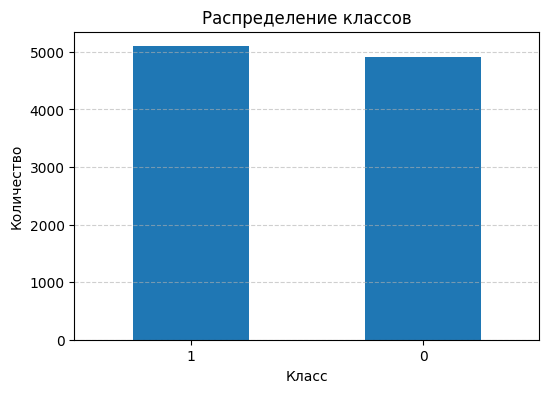

In [7]:
plt.figure(figsize=(6, 4))
df["Class"].value_counts().plot(kind="bar")
plt.title("Распределение классов")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Из гистограммы видим, что дисбаланса класса нет.

## EDA

### Распределение признаков

In [8]:
df.columns

Index(['svcscan.fs_drivers', 'callbacks.ngeneric',
       'psxview.not_in_eprocess_pool_false_avg',
       'psxview.not_in_eprocess_pool', 'callbacks.nanonymous',
       'psxview.not_in_session', 'psxview.not_in_pslist',
       'psxview.not_in_pspcid_list', 'psxview.not_in_ethread_pool',
       'psxview.not_in_csrss_handles', 'psxview.not_in_pslist_false_avg',
       'psxview.not_in_pspcid_list_false_avg', 'psxview.not_in_deskthrd',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_session_false_avg', 'Class'],
      dtype='object')

Оценим на распредленеие признаков. Возможно, что некоторые из них будут неифнормативны и бесполезны.

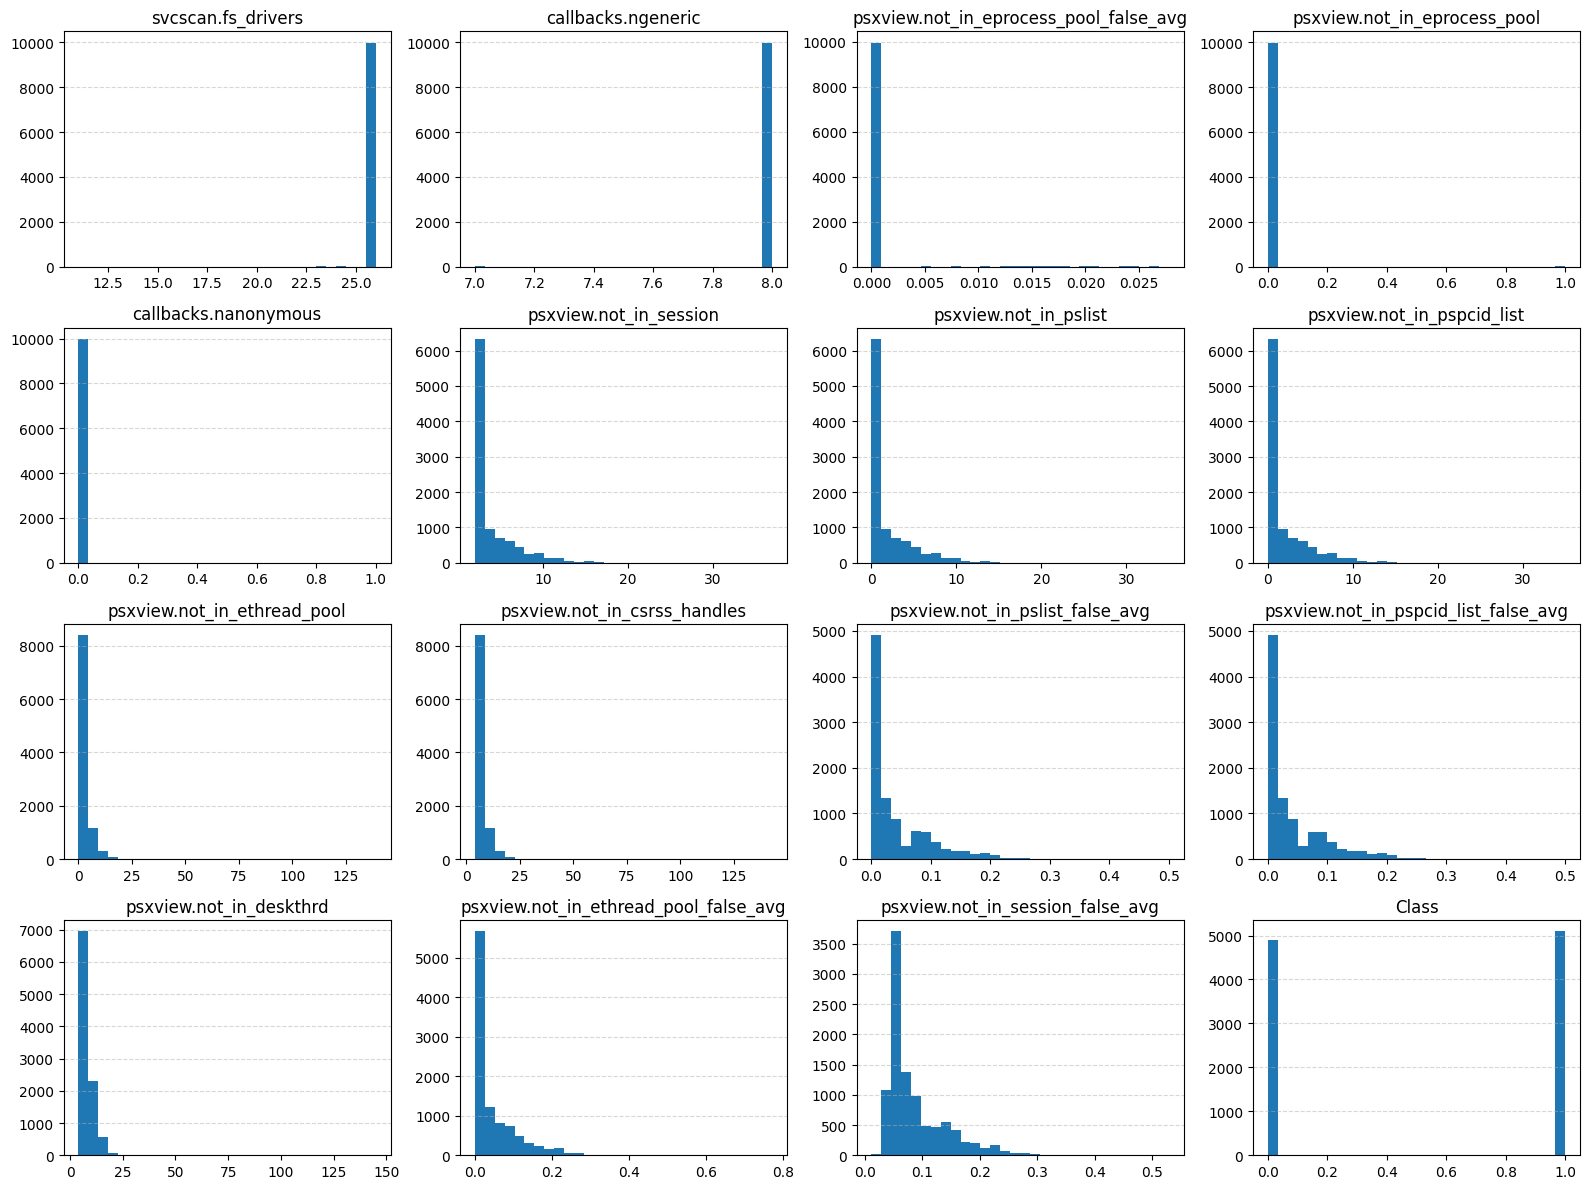

In [9]:
n_rows, n_cols = (4, 4)

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # регулируй при желании

for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

Признаки 'svcscan.fs_drivers', 'callbacks.ngeneric', 'psxview.not_in_eprocess_pool_false_avg', 'psxview.not_in_eprocess_pool' и 'callbacks.nanonymous' не информативны, т.к. > 95 процентов данных - константа => в будущем можно будет от них избавиться. Но до этого нужно ещё посмотреть матрицу корреляций и оценить количество выбросов.


При сильном дисбалансе внутри признака (напрмер 99% значений: 0–10, 1% значений: 500–5000) модель будет уделять слишком много внимания редким точкам, игнорируя основную массу данных. Это снижает точность конечной модели и её обобщающую способность.  

В остальных случаях распрделение имеет длинный правый хвост, что означает, что в признаке есть большие значения, сильно отдалённые от основной массы данных.
Чаще всего это связано с выбросами, степенной функцией признака, либо редкими, но значимыми событиями.


Такая ситуация ухудшит обучение, т.к. большие значения => большие производные => большие обновления весов => градиенты становятся нестабильными (может возникнуть взрыв градиентов).

Решением будет удаление константных признаков, обработка выбросов, масштабирование с помощью StandardScaler и, возможно, логарифмирование признаков.

In [10]:
df = df.drop(['svcscan.fs_drivers', 
              'callbacks.ngeneric', 
              'psxview.not_in_eprocess_pool_false_avg', 
              'psxview.not_in_eprocess_pool', 
              'callbacks.nanonymous'], 
             axis = 1)

### Оценка корреляции признаков

Построим матрицу корреляций Пирсона, которая показывает ЛИНЕЙНУЮ связь между признаками (нелинейные связи корреляция не увидит!). 

Важно помнить, что если два и более признака имеют корреляцию |r| > 0.8–0.9, они несут почти одинаковую информацию. 
В этом случае можно либо удалить один из признаков (оставить тот, который интерпретируемее), либо применить feature engineering (например создать отношение, разность, сумму значений призаков, в качестве новой фичи).

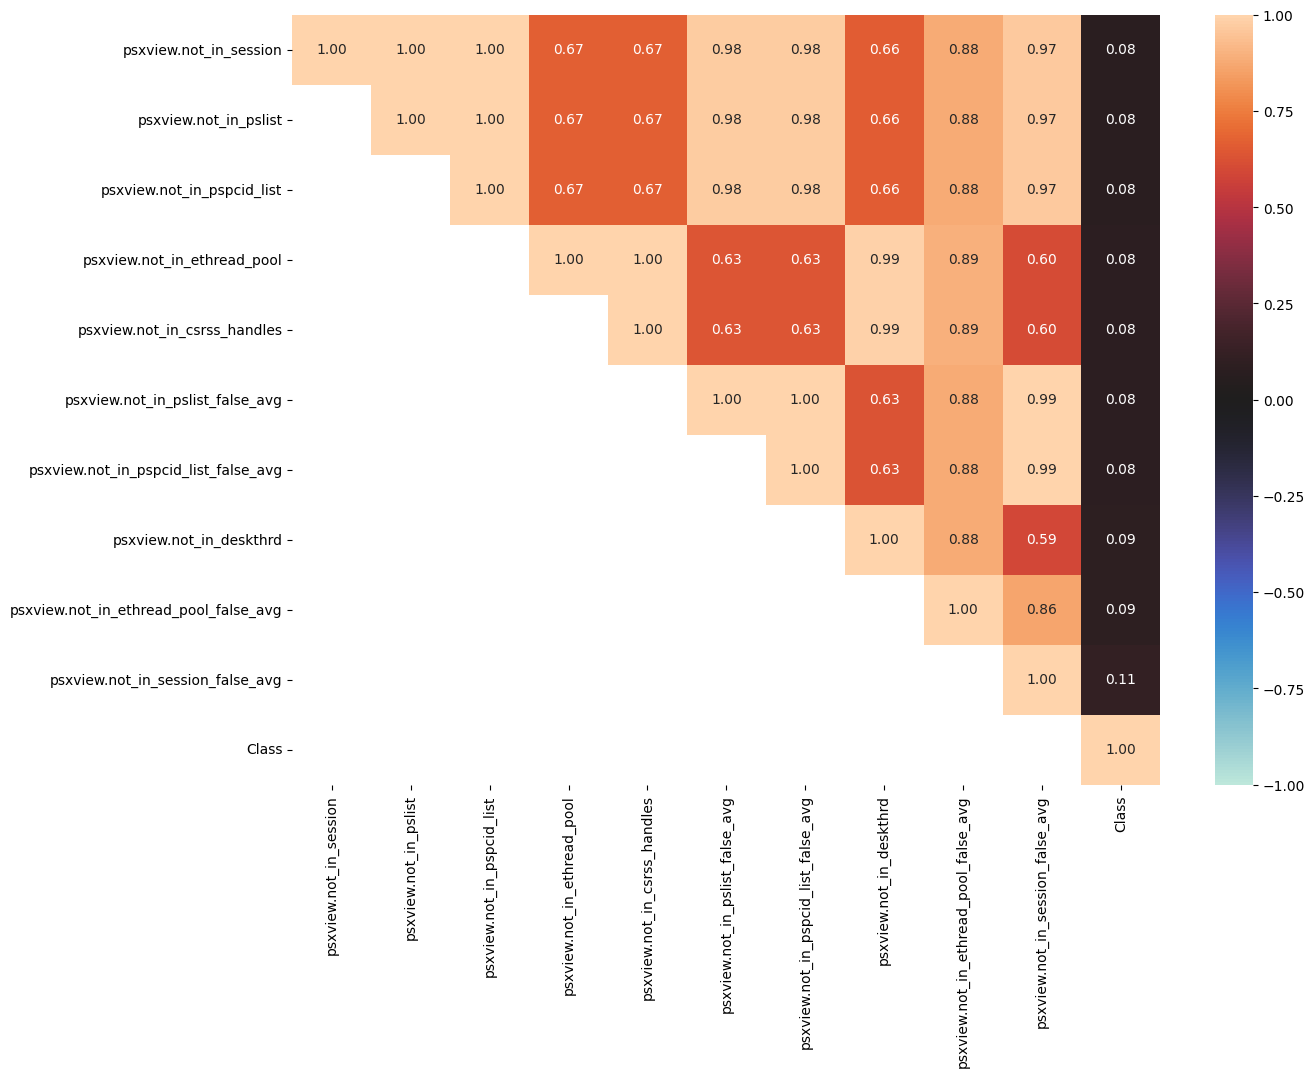

In [11]:
def plot_correlation(df):
    # Корреялция Пирсона (показывает только ЛИНЕЙНЫЕ зависимости между признаками)
    corr = df.corr()

    # Отобразим, только верхгюю часть матрицы, чтобы не перегружать график
    # маска: скрыть нижний треугольник
    # k=-1 - включаем главную диагональ для отображения
    mask = np.tril(np.ones_like(corr, dtype=bool), k=-1)

    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, 
                mask=mask,          # скрываем нижнюю часть
                vmin=-1,
                vmax=1,
                center=0,
                annot=True,
                fmt=".2f")
    plt.show()
    
plot_correlation(df)

Из матрицы корреляций видно, что некоторые группы признаков практически дублируют друг друга — они имеют одинаково высокую взаимную корреляцию и схожую связь с целевой переменной.
К таким группам относятся:

1. psxview.not_in_session, psxview.not_in_pslist, psxview.not_in_pspcid_list

2. psxview.not_in_ethread_pool, psxview.not_in_csrss_handles

3. psxview.not_in_pslist_false_avg, psxview.not_in_pspcid_list_false_avg

Эти признаки несут очень похожую информацию, поэтому для каждой группы достаточно оставить по одному наиболее информативному или интерпретируемому признаку, а остальные можно удалить, чтобы уменьшить мультиколлинеарность и упростить модель.

In [12]:
df = df.drop(['psxview.not_in_pslist', 'psxview.not_in_pspcid_list', 'psxview.not_in_csrss_handles', 'psxview.not_in_pspcid_list_false_avg'], axis = 1)

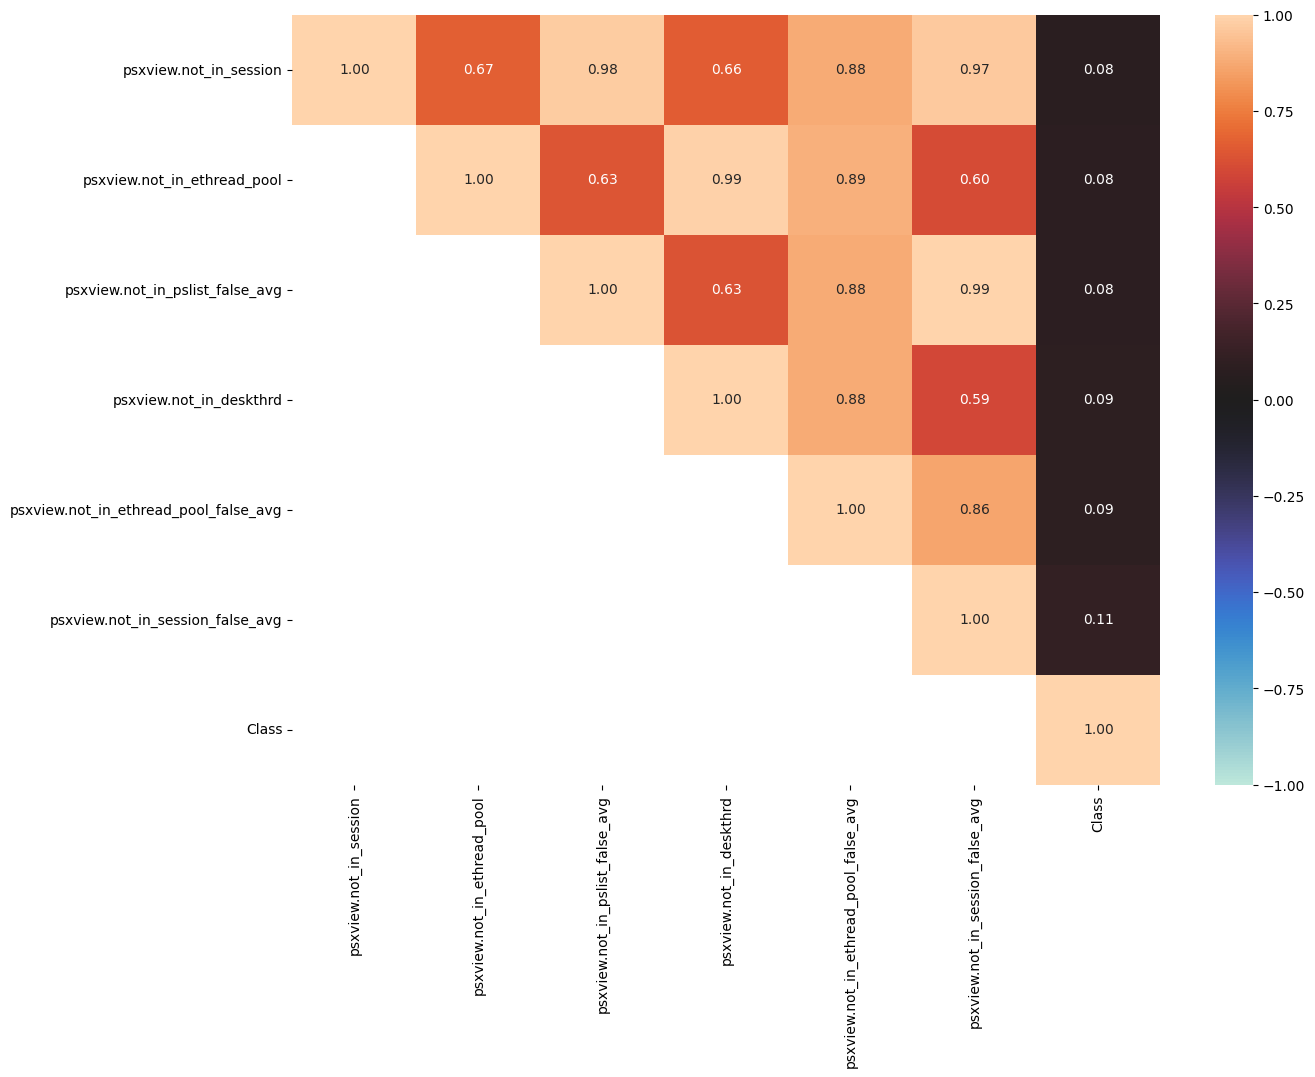

In [13]:
plot_correlation(df)

In [14]:
df.columns

Index(['psxview.not_in_session', 'psxview.not_in_ethread_pool',
       'psxview.not_in_pslist_false_avg', 'psxview.not_in_deskthrd',
       'psxview.not_in_ethread_pool_false_avg',
       'psxview.not_in_session_false_avg', 'Class'],
      dtype='object')

Между собой по прежнему сильно коррелируют признаки:

1. 'psxview.not_in_session' и 'psxview.not_in_pslist_false_avg'
2. 'psxview.not_in_session' и 'psxview.not_in_ethread_pool_false_avg'
3. 'psxview.not_in_session' и 'psxview.not_in_session_false_avg'
4. 'psxview.not_in_ethread_pool' и 'psxview.not_in_deskthrd'
5. 'psxview.not_in_ethread_pool' и 'psxview.not_in_ethread_pool_false_avg'
6. 'psxview.not_in_pslist_false_avg' и 'psxview.not_in_ethread_pool_false_avg',
7. 'psxview.not_in_pslist_false_avg' и 'psxview.not_in_session_false_avg'
8. 'psxview.not_in_deskthrd' и 'psxview.not_in_ethread_pool_false_avg'


Это означает, что:

1) признаки дублируют друг друга

2) несут одну и ту же информацию

3) по сути являются разными представлениями одного и того же признака

4) либо один является сглаженной/усреднённой версией другого (*_false_avg)


Воспользуемся библиотекой featurewiz для отбора признаков.

In [15]:
features, df = featurewiz(df, target='Class')

featurewiz has selected 0.8 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Binary_Classification problem 
    Loaded train data. Shape = (10000, 7)
    Some column names had special characters which were removed...
    Single_Label Binary_Classification problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Binary_Classification problem 
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or low-information variables found in 

In [16]:
features

['psxview.not_in_session_false_avg', 'psxview.not_in_deskthrd']

In [17]:
df.head()

,psxview.not_in_session_false_avg,psxview.not_in_deskthrd,Class
0,0.044444,6,1
1,0.121951,9,1
2,0.195652,13,1
3,0.066667,9,1
4,0.048780,6,0


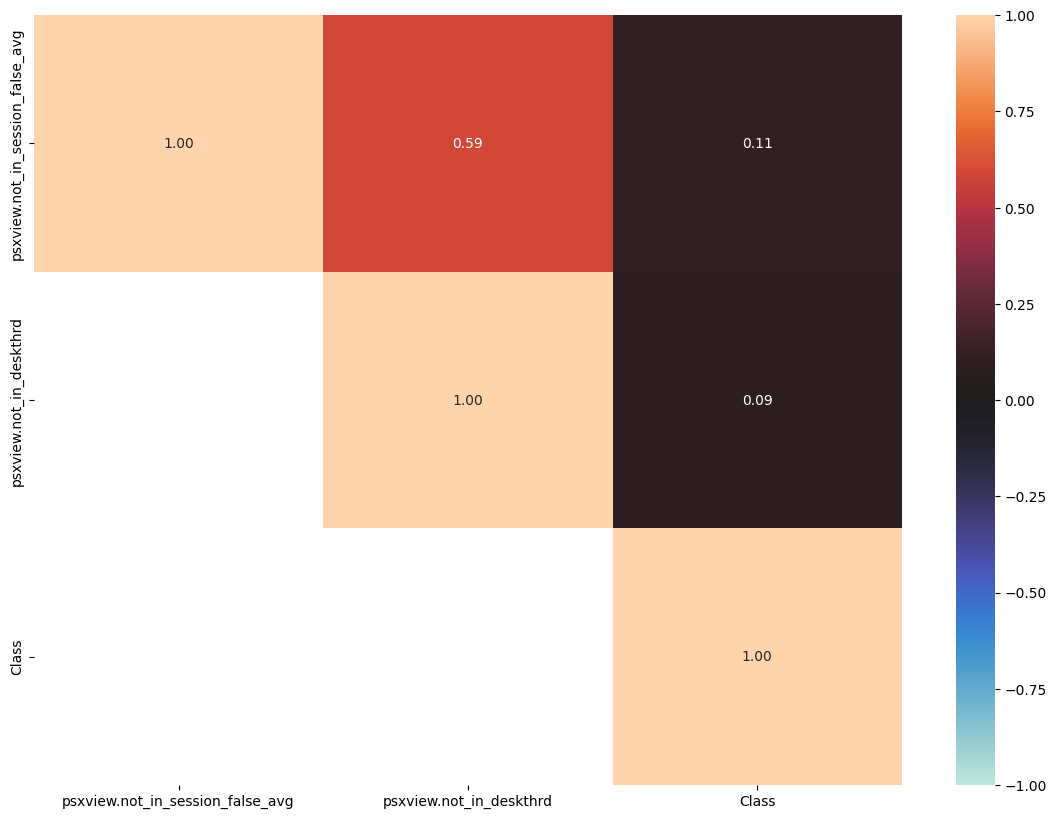

In [18]:
plot_correlation(df)

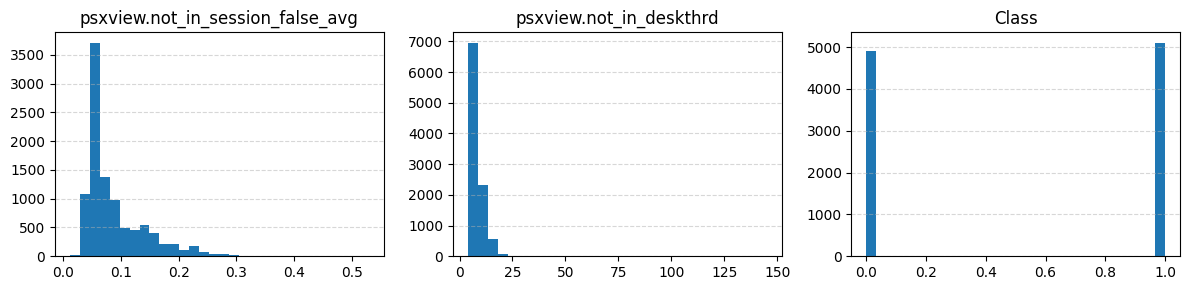

In [19]:
n_rows, n_cols = (1, 3)

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # регулируй при желании

for i, col in enumerate(df.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=30)
    plt.title(col)
    plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

После отбора признаков осталось всего два наиболее информативных признака:
psxview.not_in_session_false_avg и psxview.not_in_deskthrd, при этом их взаимная корреляция составляет 0.59 — умеренная, но не критическая.

Однако их связь с целевой переменной остаётся слабой:

1) корреляция psxview.not_in_session_false_avg → Class = 0.11

2) корреляция psxview.not_in_deskthrd → Class = 0.09


Это означает, что простые линейные модели (например, Logistic Regression) могут показывать невысокое качество.

Польза этих признаков может проявляться только в нелинейных моделях.

Например: RandomForest, Gradient Boosting, XGBoost, CatBoost, нейросети.

### Обработка выбросов

Теперь поработаем с выбросами.

Удаленим выбросы для признака 'psxview.not_in_deskthrd' с помощью метода IQR.

1. Рассчитываем первый квартиль (Q1), медиану и третий квартиль (Q3).
2. Вычисляем межквартильный размах (IQR = Q3 - Q1).
3. Определяем нижнюю и верхнюю границы выбросов как:
       min_border = Q1 - 1.5 * IQR
       max_border = Q3 + 1.5 * IQR
4. Фильтруем датасет, удаляя наблюдения, выходящие за пределы этих границ.

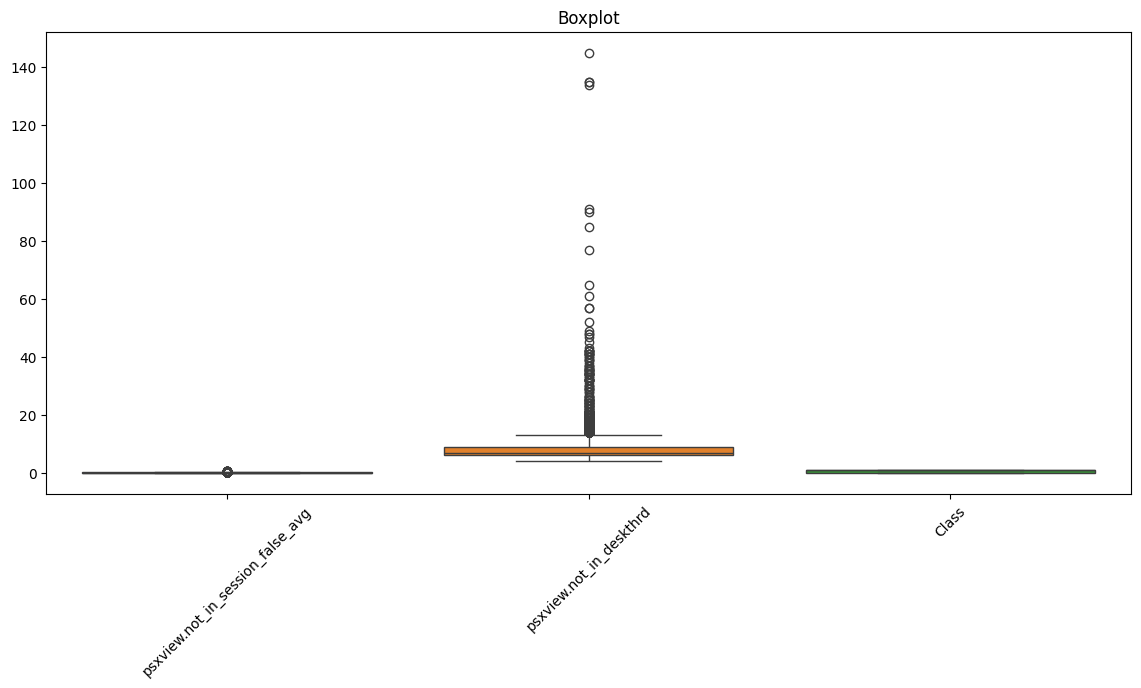

In [20]:
def plot_boxplot(df):
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df)
    plt.xticks(rotation=45)
    plt.title("Boxplot")
    plt.show()
    
plot_boxplot(df)

In [21]:
q1 = df['psxview.not_in_deskthrd'].quantile(0.25)
q2 = df['psxview.not_in_deskthrd'].median()
q3 = df['psxview.not_in_deskthrd'].quantile(0.75)

iqr = q3 - q1
iqr

3.0

In [22]:
min_border = q1 - 1.5 * iqr
max_border = q3 + 1.5 * iqr
min_border, max_border

(1.5, 13.5)

In [23]:
df = df[
          (df['psxview.not_in_deskthrd'] > min_border) &
          (df['psxview.not_in_deskthrd'] < max_border)
        ]
                      
df.shape 

(9255, 3)

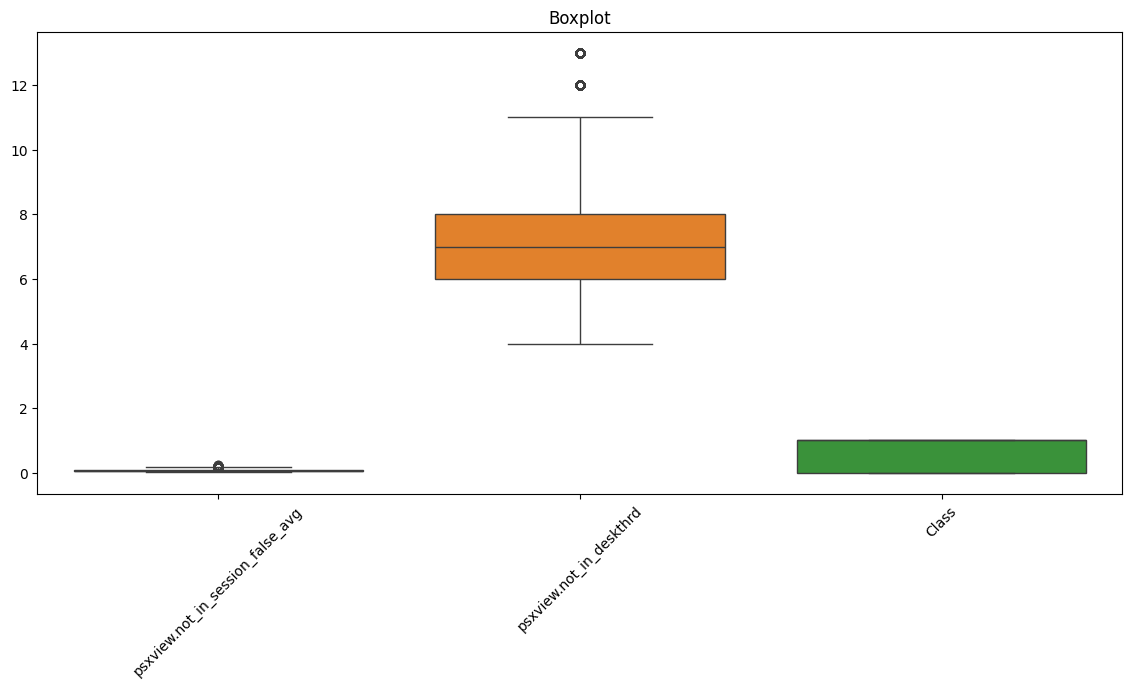

In [24]:
plot_boxplot(df)

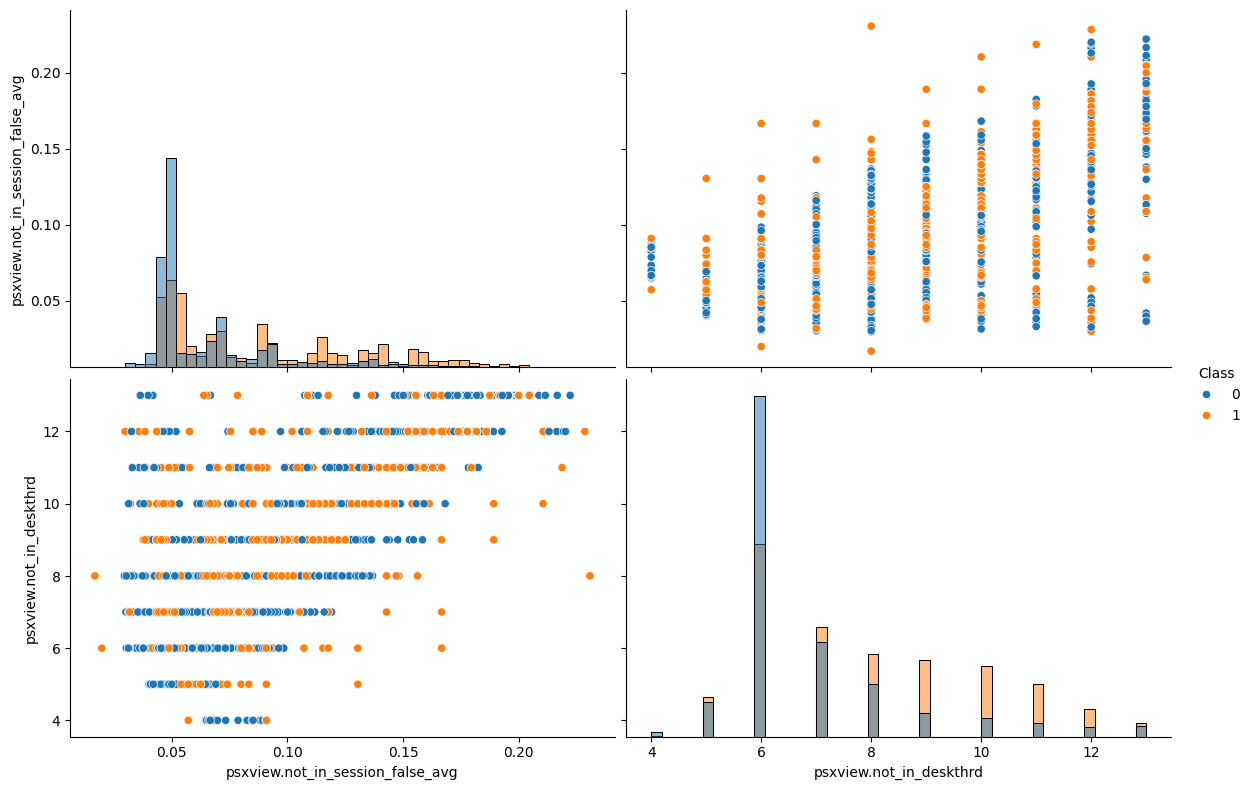

In [25]:
# Построим paiplot
sns.pairplot(df, 
             hue="Class", 
             diag_kind="hist", # размер одного subplot
             height=4,
             aspect=1.5)

Из pairplot видим, что признаки psxview.not_in_session_false_avg и psxview.not_in_deskthrd не зависят друг от друга. 

## Подготовка обучающих данных

Далее разделим датасет на обучающую, валидационную и тестовую выборки со стратификацией в пропорции 60/20/20. В качестве целевой переменной используем столбец Class - бинарный столбец (0 - нейтральное ПО, 1 - вредоносное ПО).

In [26]:
# X — все признаки, кроме Class
# y — целевая переменная
X = df.drop("Class", axis=1)
y = df["Class"]

In [27]:
# Сначала отделяем test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
                                                                X, y,
                                                                test_size=0.2,
                                                                stratify=y,
                                                                random_state=42
                                                            )

In [28]:
# Затем отделяем validation от train_val: 
# Нужно получить 20% от общего датасета - это 20/80 = 0.25 от train_val
X_train, X_val, y_train, y_val = train_test_split(
                                                    X_train_val, y_train_val,
                                                    test_size=0.25, 
                                                    stratify=y_train_val,
                                                    random_state=42
                                                )

In [29]:
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (5553, 2) (5553,)
Validation: (1851, 2) (1851,)
Test: (1851, 2) (1851,)


В нейросетях важно, чтобы признаки были сопоставимы по масштабу => стандартизируем их, с помощью StandardScaler.

После масштабирования получается, что среднее каждого признака будет около 0, а стандартное отклонение около 1.

Таким образом, все признаки будут иметь сопоставимый масштаб.

In [30]:
scaler = StandardScaler()

In [31]:
# fit на train, transform на всех выборках
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [32]:
print(f'X_train_scaled min: {X_train_scaled.min()}, X_train_scaled max: {X_train_scaled.max()}')
print(f'X_train_scaled mean: {X_train_scaled.mean()}, X_train_scaled std: {X_train_scaled.std()}')

X_train_scaled min: -1.740838068018853, X_train_scaled max: 3.9871795781880075
X_train_scaled mean: -5.1182620980378186e-17, X_train_scaled std: 0.9999999999999999


In [33]:
print(f'X_val_scaled min: {X_val_scaled.min()}, X_val_scaled max: {X_val_scaled.max()}')
print(f'X_val_scaled mean: {X_val_scaled.mean()}, X_val_scaled std: {X_val_scaled.std()}')

X_val_scaled min: -1.740838068018853, X_val_scaled max: 3.763944251304962
X_val_scaled mean: -0.03306491047646471, X_val_scaled std: 0.9818646600839015


In [34]:
print(f'X_test_scaled min: {X_test_scaled.min()}, X_test_scaled max: {X_test_scaled.max()}')
print(f'X_test_scaled mean: {X_test_scaled.mean()}, X_test_scaled std: {X_test_scaled.std()}')

X_test_scaled min: -1.740838068018853, X_test_scaled max: 3.929776216626763
X_test_scaled mean: -0.038690591570100026, X_test_scaled std: 1.0053900401348113


In [35]:
# Преобразуем y_train в numpy
y_train= y_train.to_numpy().reshape(-1, 1)
y_val= y_val.to_numpy().reshape(-1, 1)
y_test= y_test.to_numpy().reshape(-1, 1)

In [36]:
type(X_train_scaled)

numpy.ndarray

Реализуем класс-обёртку для данных CustomDataset.

При инициализации все данные преобразуются в torch.tensor.

Встроенный метод len возвращает рвзмер датасета, а метод getitem позволяет получить пример из данных по его индексу.

In [37]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        # Переводим данные в torch.Tensor
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

Инициализируем обучающий, валидационный и тестовый датасет.

Также выведем размер датасета и один пример из данных. 

In [38]:
train_data = CustomDataset(X_train_scaled, 
                           y_train)
print(len(train_data))
print(train_data[10])

5553
(tensor([0.4473, 0.2919]), tensor([1.]))


In [39]:
val_data = CustomDataset(X_val_scaled, 
                         y_val)
print(len(val_data))
print(val_data[1])

1851
(tensor([2.1150, 1.8165]), tensor([1.]))


In [40]:
test_data = CustomDataset(X_test_scaled, 
                          y_test)
print(len(test_data))
print(test_data[1])

1851
(tensor([-0.7964, -0.7244]), tensor([0.]))


Класс DataLoader помогает эффективно загружать данные для обучения нейронных сетей. 

Он берёт датасет и превращает его в пачки (батчи) данных, которые подаются модели во время обучения.

Для начала устанвим размер батча равным 64, в качестве бейзлайна.

In [41]:
BATCH_SIZE = 64

In [42]:
# Создаём DataLoader (чтобы получить батч)
train_dataloader = torch.utils.data.DataLoader(train_data, 
                                               batch_size=BATCH_SIZE,
                                               shuffle=False)


val_dataloader = torch.utils.data.DataLoader(val_data, 
                                             batch_size=BATCH_SIZE,
                                             shuffle=False)



test_dataloader = torch.utils.data.DataLoader(test_data, 
                                              batch_size=BATCH_SIZE,
                                              shuffle=False)

len(train_dataloader), len(val_dataloader), len(test_dataloader)

(87, 29, 29)

Количество батчей в обучающей выборке - 87, в валидационной и тестовой - 29, при заданном размере батча - 64 единицы данных.

## Baseline. Инициализация нейронной сети

In [43]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self, 
                 n_features=2,  # количество фич
                 n_neurons=16): # количество нейронов на скрытом слое
        super().__init__()
        
        self.fc1 = torch.nn.Linear(n_features, n_neurons)
        self.act1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(n_neurons, 1)

    def forward(self, x):
        """Логика прямого прохождения данных по сети (feed forward)"""
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x 

**Структура сети:**

1. **Входной слой**

   * Принимает два стандартизированных признака (in_features=2).

2. **Скрытый слой**

   * fc1: полносвязный слой из 16 нейронов.
   * act1: функция активации ReLU.

3. **Выходной слой**

   * fc2: один нейрон, выдающий логит (ненормированное значение).
   * На выходе используется BCEWithLogitsLoss(), поэтому сигмоида применяется внутри функции ошибки.

ReLU выбрана как функция активации, потому что она ускоряет обучение, не страдает от исчезающих градиентов, создает разреженные и устойчивые представления данных и хорошо работает в задачах классификации на табличных данных.

Это делает сеть более стабильной и быстрой в обучении по сравнению с Sigmoid или Tanh в скрытых слоях.

In [44]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [45]:
model = NeuralNetwork(n_features=2, 
                      n_neurons=16).to(device)


model

NeuralNetwork(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)

In [46]:
def train(model, optimizer):
    """Функция обучения для 1 эпохи"""
    # Установка модели в режим обучения
    model.train()

    running_loss = 0.0

    # проходим по всем батчам, 1 эпоха
    for inputs, targets in train_dataloader:
        # inputs - размер batch_size (=64) x features_num (=2)
        inputs = inputs.to(device)
        # targets - размер batch_size (=64) x 1
        targets = targets.to(device)

        # Обнуление градиентов
        optimizer.zero_grad()
        # Прямой проход
        outputs = model.forward(inputs)
        # Вычисление ошибки для одного батча данных
        loss_value = loss(outputs, targets)
        # Обратный проход
        loss_value.backward()
        # Обновление параметров
        optimizer.step()

        # Ошибка за эпоху по всем батчам
        running_loss += loss_value.item()

    # Средняя ошибка за эпоху
    # running_loss - ошибка за эпоху по всем батчам в обучающей выборке
    # len(train_dataloader) - количество батчей в обучающей выборке
    avg_loss = running_loss / len(train_dataloader)
    return avg_loss

In [47]:
def validation(model):
    """Функция валидации для 1 эпохи"""
    # Валидация
    # Установка модели  режим оценки
    model.eval()

    with torch.no_grad():
        

        val_loss = 0.0
        for inputs, targets in val_dataloader:
            
            # inputs - размер batch_size x features_num (=2)
            inputs = inputs.to(device)
            # targets - размер batch_size x 1
            targets = targets.to(device)

            outputs = model.forward(inputs)

            loss_value = loss(outputs, targets)

            val_loss += loss_value.item()

    # Средняя ошибка за эпоху
    # val_loss - ошибка за эпоху по всем батчам валидационной выборки
    # len(val_dataloader) - количество батчей в валидационной выборки
    avg_val_loss = val_loss / len(val_dataloader)
    return avg_val_loss

In [48]:
def evaluate_metrics(model, dataloader):
    """ Функция подсчёта метрик (accuracy, precision, recall, f1). """
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            logits = model(inputs)
            probs = torch.sigmoid(logits)         # Преобразуем логиты в вероятности
            preds = (probs > 0.5).float()         # Бинаризация

            all_preds.append(preds.cpu())
            all_targets.append(targets.cpu())

    all_preds = torch.cat(all_preds).numpy().ravel()
    all_targets = torch.cat(all_targets).numpy().ravel()

    metrics = {
        "accuracy": accuracy_score(all_targets, all_preds),
        "precision": precision_score(all_targets, all_preds, zero_division=0),
        "recall": recall_score(all_targets, all_preds, zero_division=0),
        "f1": f1_score(all_targets, all_preds, zero_division=0)
    }
    return metrics

**Loss-функция**

Будем использовать BCEWithLogitsLoss вместо BCELoss. Они отличаются тем, что BCEWithLogitsLoss используется, когда модель не содержит функцию активации Sigmoid() в конце.

PyTorch "под капотом" делает: sigmoid(logits) → BCELoss(probabilities), из-за этого обучение более стабильно.

В целом, выбор BCEWithLogitsLoss обусловлен большей стабильностью для задачи бинарной классификации.

**Оптимизатор**

В качестве потимизатора будем использовать Adam, т.к. он реализует один из наиболее популярных и стабильных методов оптимизации нейросетей.

In [49]:
# criterion = torch.nn.BCELoss()
loss = torch.nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [50]:
history = {
    "train_loss": [],
    "val_loss": [],
    "train_metrics": [],
    "val_metrics": []
}

Сперва обучим модель на 10 эпохах.

In [51]:
num_epochs = 20

for epoch in range(num_epochs):
    
    avg_epoch_train_loss = train(model = model, optimizer = optimizer)
    avg_epoch_val_loss = validation(model = model)
    
    # Метрики
    train_metrics = evaluate_metrics(model, train_dataloader)
    val_metrics = evaluate_metrics(model, val_dataloader)

    # Сохранение истории
    history["train_loss"].append(avg_epoch_train_loss)
    history["val_loss"].append(avg_epoch_val_loss)
    history["train_metrics"].append(train_metrics)
    history["val_metrics"].append(val_metrics)

    # Вывод
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f" Train Loss: {avg_epoch_train_loss:.6f}")
    print(f" Val Loss:   {avg_epoch_val_loss:.6f}")
    print(f" Train Metrics: acc={train_metrics['accuracy']:.3f}, "
          f"prec={train_metrics['precision']:.3f}, "
          f"rec={train_metrics['recall']:.3f}, f1={train_metrics['f1']:.3f}")
    print(f" Val   Metrics: acc={val_metrics['accuracy']:.3f}, "
          f"prec={val_metrics['precision']:.3f}, "
          f"rec={val_metrics['recall']:.3f}, f1={val_metrics['f1']:.3f}\n")

Epoch 1/20
 Train Loss: 0.648355
 Val Loss:   0.639938
 Train Metrics: acc=0.619, prec=0.684, rec=0.512, f1=0.586
 Val   Metrics: acc=0.625, prec=0.703, rec=0.496, f1=0.582

Epoch 2/20
 Train Loss: 0.642559
 Val Loss:   0.637011
 Train Metrics: acc=0.620, prec=0.682, rec=0.521, f1=0.590
 Val   Metrics: acc=0.625, prec=0.695, rec=0.510, f1=0.588

Epoch 3/20
 Train Loss: 0.639678
 Val Loss:   0.633768
 Train Metrics: acc=0.623, prec=0.663, rec=0.574, f1=0.615
 Val   Metrics: acc=0.629, prec=0.675, rec=0.567, f1=0.616

Epoch 4/20
 Train Loss: 0.636315
 Val Loss:   0.630180
 Train Metrics: acc=0.620, prec=0.680, rec=0.522, f1=0.591
 Val   Metrics: acc=0.623, prec=0.691, rec=0.513, f1=0.589

Epoch 5/20
 Train Loss: 0.632934
 Val Loss:   0.627019
 Train Metrics: acc=0.636, prec=0.672, rec=0.598, f1=0.633
 Val   Metrics: acc=0.638, prec=0.679, rec=0.590, f1=0.631

Epoch 6/20
 Train Loss: 0.629806
 Val Loss:   0.623791
 Train Metrics: acc=0.647, prec=0.672, rec=0.643, f1=0.657
 Val   Metrics: 

In [52]:
def plot_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    #  Loss
    plt.figure(figsize=(12,5))
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Метрики 
    metrics = ["accuracy", "precision", "recall", "f1"]
    for metric in metrics:
        plt.figure(figsize=(12,5))
        plt.plot(epochs, [m[metric] for m in history["train_metrics"]], label=f"Train {metric}")
        plt.plot(epochs, [m[metric] for m in history["val_metrics"]], label=f"Val {metric}")
        plt.xlabel("Epoch")
        plt.ylabel(metric)
        plt.title(f"{metric.capitalize()} over Epochs")
        plt.legend()
        plt.grid(True)
        plt.show()


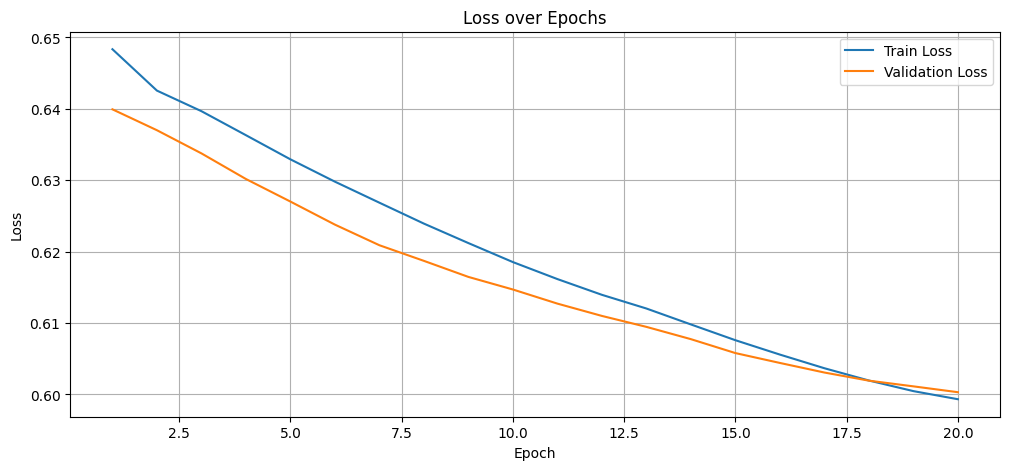

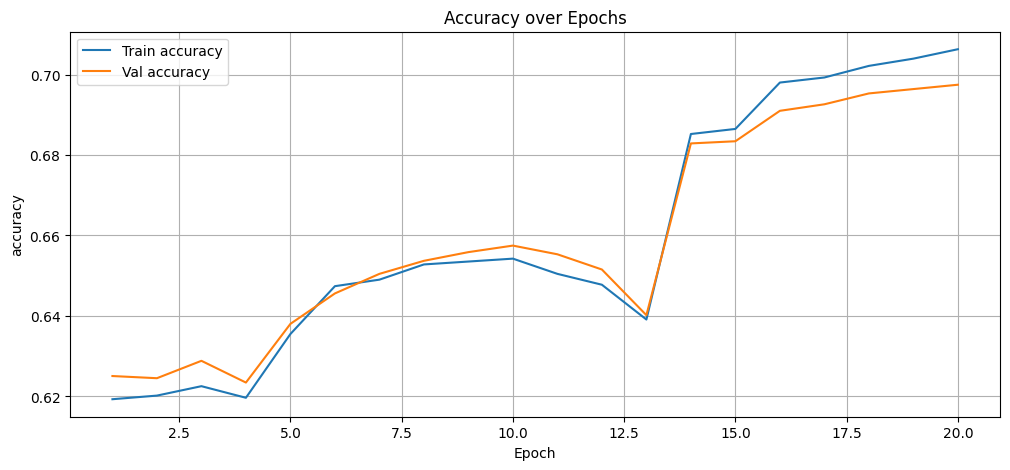

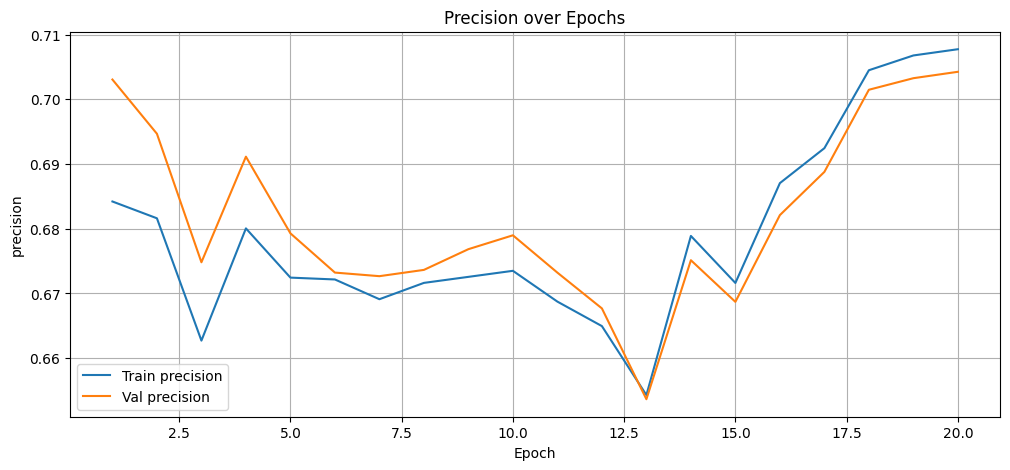

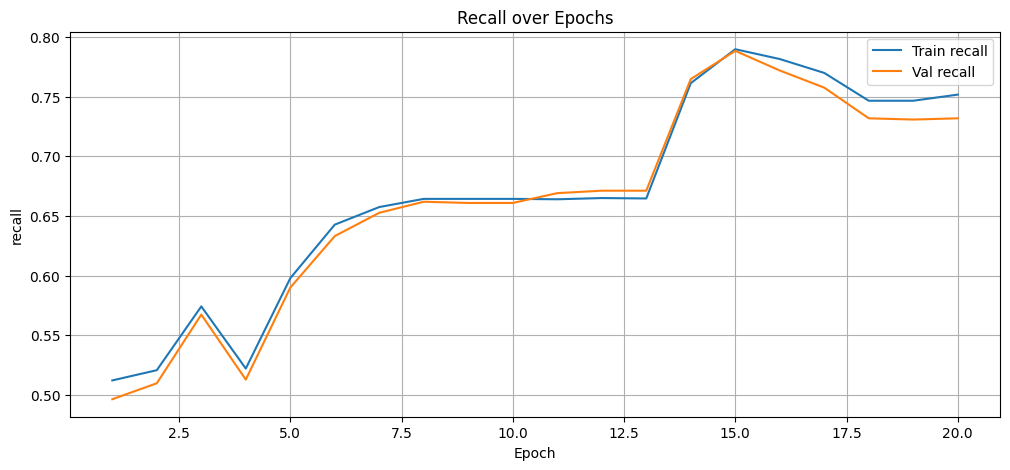

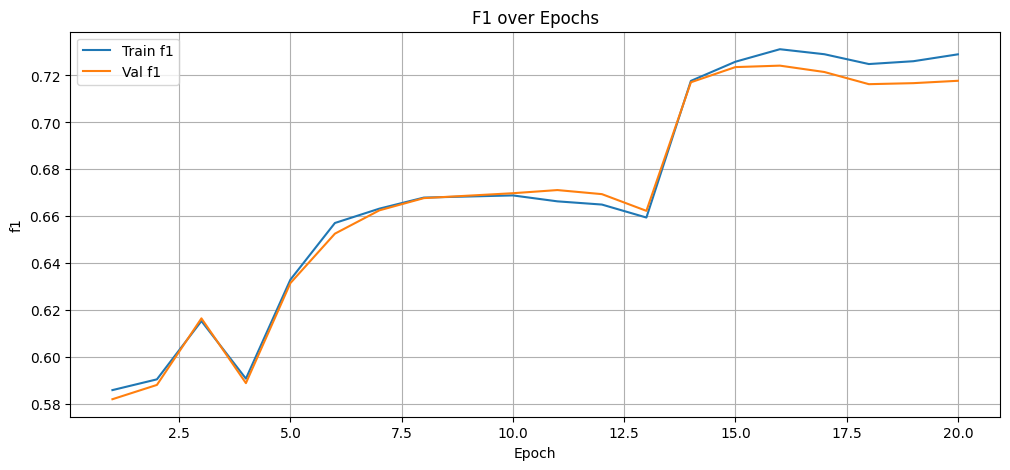

In [53]:
plot_history(history)

In [54]:
train_metrics = evaluate_metrics(model, train_dataloader)
train_metrics

{'accuracy': 0.7062848910498829,
 'precision': 0.707741935483871,
 'recall': 0.7516272696128812,
 'f1': 0.7290247549426815}

In [55]:
val_metrics = evaluate_metrics(model, val_dataloader)
val_metrics

{'accuracy': 0.697460831982712,
 'precision': 0.7042532146389713,
 'recall': 0.7317574511819116,
 'f1': 0.717741935483871}

**1. Динамика ошибки (Loss)**

По графикам изменения ошибки видно, что:

* **train loss** устойчиво и равномерно убывал на всём протяжении обучения;
* **validation loss** также снижался, следуя за тренировочным, без резких скачков или роста.

Это говорит о том, что переобучения не наблюдается: модель обучается стабильно, и её обобщающая способность не ухудшается.


**2. Динамика метрик качества**

* Основные метрики (accuracy, precision, recall, F1) **плавно росли от эпохи к эпохе**.
* Примерно после **15-й эпохи** произошел скачок роста метрик (кроме Recall).

Это означает, что модель достигла своего естественного предела на данных в текущей архитектуре и с текущими признаками.


**3. Поведение Recall**

Recall растёт до 15-й эпохи, после чего постепенно уменьшается. Возможная причина: модель начинает чуть сильнее смещаться в сторону класса 0.

Тем не менее, падение небольшое и не влияет критически на итоговую F1-оценку.

**4. Итоговые значения метрик**

Train:

* Accuracy: **0.706**
* Precision: **0.707**
* Recall: **0.751**
* F1: **0.729**

Validation:

* Accuracy: **0.697**
* Precision: **0.704**
* Recall: **0.731**
* F1: **0.717**

Почти полное совпадение train и validation метрик - отличный признак.
Модель **не переобучилась** и хорошо обобщает закономерности.

In [56]:
def get_predictions(model, dataloader):
    """ Функция вычисления предсказаний. """
    
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.to(device)
            targets = targets.to(device)

            logits = model(inputs)
            probs = torch.sigmoid(logits)
            preds = (probs > 0.5).float()

            all_preds.append(preds.cpu())
            all_targets.append(targets.cpu())

    all_preds = torch.cat(all_preds).numpy().ravel()
    all_targets = torch.cat(all_targets).numpy().ravel()
    return all_targets, all_preds

In [57]:
def evaluate_classification(model, dataloader, name="Dataset"):
    y_true, y_pred = get_predictions(model, dataloader)

    print(f"\n {name}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))


In [58]:
def plot_confusion_matrix(y_true, y_pred):
    
    class_names = ["Нейтральное ПО", "Вредоносное ПО"]

    # Матрица ошибок
    cm = confusion_matrix(y_true, y_pred)
    # print(cm)
    acc = accuracy_score(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names
    )

    plt.xlabel("Предсказанный класс")
    plt.ylabel("Истинный класс")
    plt.title(f"Confusion Matrix — Accuracy: {acc:.2f}")
    plt.tight_layout()

In [59]:
test_metrics = evaluate_metrics(model, test_dataloader)
test_metrics

{'accuracy': 0.7077255537547271,
 'precision': 0.708092485549133,
 'recall': 0.7553956834532374,
 'f1': 0.730979612133267}

In [60]:
evaluate_classification(model, test_dataloader, "Test")


 Test

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7073    0.6549    0.6801       878
         1.0     0.7081    0.7554    0.7310       973

    accuracy                         0.7077      1851
   macro avg     0.7077    0.7051    0.7055      1851
weighted avg     0.7077    0.7077    0.7068      1851



**1. Класс 0 — нейтральное ПО**

* **Precision =0.707**
  Из всех объектов, которые модель классифицировала как нейтральные, ~70% действительно являются таковыми.

* **Recall = 0.654**
  Модель правильно находит ~65% всех нейтральных объектов.

* **F1 = 0.680**
  Сбалансированная метрика показывает стабильную работу для этого класса.

Модель иногда ошибочно относит нейтральные файлы к вредоносным.
Такой тип ошибки более безопасен: лучше ложная тревога, чем пропуск угрозы.


**2. Класс 1 — вредоносное ПО**

* **Precision = 0.708**
  Если модель говорит, что файл вредоносный — в 70% случаев это верно.

* **Recall = 0.755**
  Модель корректно находит **почти 75% всех вредоносных объектов**.

* **F1 = 0.731**
  Лучший показатель среди классов, что важно для сценария кибербезопасности.

Высокий Recall класса 1 особенно важен: модель хорошо справляется с задачей обнаружения вредоносных программ.


**3. Общая оценка качества модели**

* **Accuracy = 0.707**
  Общая точность на тесте — около **70%**.

* **Macro avg F1 =0.705**
  Метрики по классам сбалансированы, модель не смещена в пользу какого-либо класса.

* **Weighted avg F1 =0.706**
  С учётом дисбаланса классов — качество остаётся стабильным.

**4. Вывод:**

Модель уверенно и одинаково хорошо классифицирует как нейтральное ПО, так и вредоносное.

Качество на тестовой выборке практически совпадает с обучением и валидцией => переобучения нет.

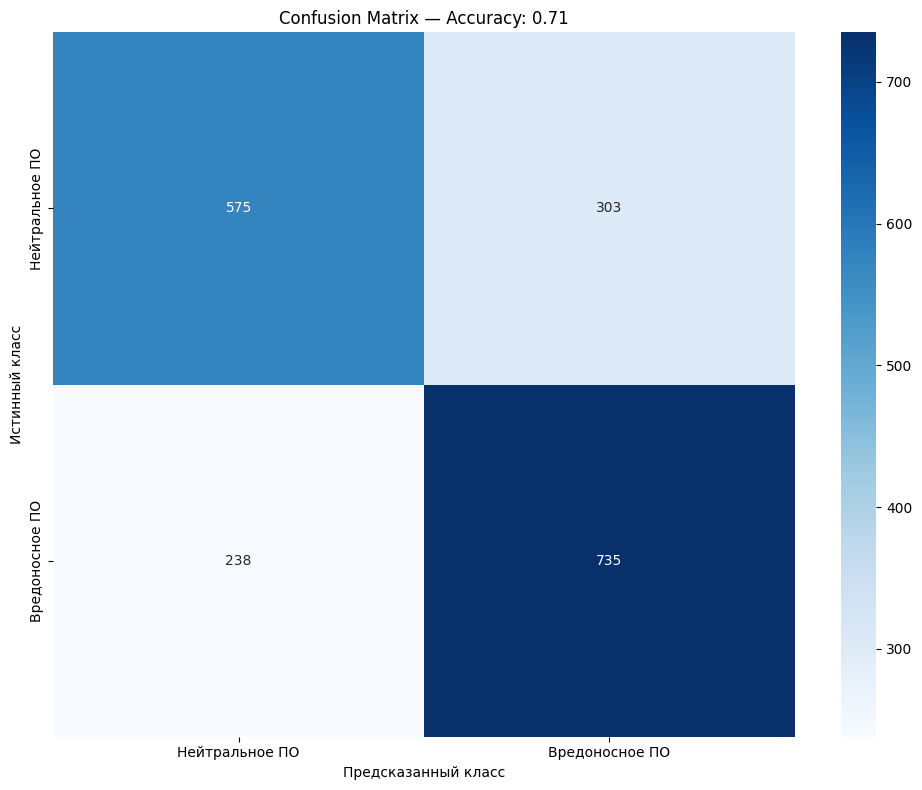

In [61]:
y_true, y_pred = get_predictions(model, test_dataloader)
plot_confusion_matrix(y_true, y_pred)

**1. Класс 0 - нейтральное ПО**

* **575 образцов** классифицированы правильно.
* **303** ошибочно отнесены к вредоносным (ложные срабатывания).

Это означает повышенное количество False Positive:
некоторое нейтральное ПО модель “перестраховывается” и помечает как вредоносное.


**2. Класс 1 - вредоносное ПО**

* **735 вредоносных образцов** распознаны верно.
* **238** модель ошибочно классифицирует как безопасные.

Это более критичный тип ошибки: модель иногда **пропускает вредоносное ПО**, считая его безопасным.


**3. Общая картина**

* Модель лучше распознаёт вредоносные программы (TP = 735)
  и при этом часто ошибается в пользу ложной тревоги для нейтральных программ.

* Ошибки распределяются относительно симметрично:

  * FP (ошибка на классе 0) = 303
  * FN (ошибка на классе 1) = 238

То есть модель не сильно смещена в сторону какого-либо класса, но немного чаще "перепредсказывает" вредоносность.


**4. Вывод**

* Модель в целом работает сбалансированно.
* Основная потенциально опасная ошибка - пропуск вредоносного ПО (FN = 238).

## Инициализация улучшенной нейронной сети. Добавляем Dropout

Dropout может улучшить результат в маленьких сетях и при данных, склонных к переобучению.

Он случайно «выключает» часть нейронов в процессе обучения (в нашем случае — всего 5%).
Это заставляет модель:

* не опираться на отдельные "сильные" нейроны,
* искать более устойчивые комбинации признаков,
* учиться более обобщённым шаблонам.

В итоге модель становится менее чувствительной к шуму и лучше работает на валидации/тесте.

In [62]:
class ImprovedNet(torch.nn.Module):
    def __init__(self, 
                 n_features=2, 
                 n_neurons=16,
                 dropout_p=0.05):  # минимальный dropout!
        
        super().__init__()
        
        self.fc1 = torch.nn.Linear(n_features, n_neurons)
                
        self.drop = torch.nn.Dropout(dropout_p)

        self.act1 = torch.nn.ReLU()
    
        self.fc2 = torch.nn.Linear(n_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.drop(x)
        x = self.fc2(x)
        return x


**Структура сети:**

1. **Входной слой**

   * Принимает два стандартизированных признака (in_features=2).

2. **Скрытый слой**

   * **fc1**: полносвязный слой из 16 нейронов.
   * **act1**: функция активации ReLU.
   * **dropout**: слой Dropout с вероятностью отключения нейронов p=0.05 — лёгкая регуляризация, уменьшающая переобучение.

3. **Выходной слой**

   * **fc2**: один нейрон, выдающий логит (ненормированное значение).
   * На выходе используется **BCEWithLogitsLoss()**, поэтому сигмоида применяется внутри функции ошибки, что обеспечивает численную стабильность.

In [63]:
improve_model = ImprovedNet().to(device)
improve_model

ImprovedNet(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (drop): Dropout(p=0.05, inplace=False)
  (act1): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)

In [64]:
optimizer_improve = torch.optim.Adam(improve_model.parameters(), lr = 0.01)

In [65]:
history_improve = {
                        "train_loss": [],
                        "val_loss": [],
                        "train_metrics": [],
                        "val_metrics": []
                    }

In [66]:
num_epochs = 20

for epoch in range(num_epochs):
    
    avg_epoch_train_loss = train(model = improve_model, optimizer = optimizer_improve)
    avg_epoch_val_loss = validation(model = improve_model)
    
    # Метрики
    train_metrics = evaluate_metrics(improve_model, train_dataloader)
    val_metrics = evaluate_metrics(improve_model, val_dataloader)

    # Сохранение истории
    history_improve["train_loss"].append(avg_epoch_train_loss)
    history_improve["val_loss"].append(avg_epoch_val_loss)
    history_improve["train_metrics"].append(train_metrics)
    history_improve["val_metrics"].append(val_metrics)

    # Вывод
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f" Train Loss: {avg_epoch_train_loss:.6f}")
    print(f" Val Loss:   {avg_epoch_val_loss:.6f}")
    print(f" Train Metrics: acc={train_metrics['accuracy']:.3f}, "
          f"prec={train_metrics['precision']:.3f}, "
          f"rec={train_metrics['recall']:.3f}, f1={train_metrics['f1']:.3f}")
    print(f" Val   Metrics: acc={val_metrics['accuracy']:.3f}, "
          f"prec={val_metrics['precision']:.3f}, "
          f"rec={val_metrics['recall']:.3f}, f1={val_metrics['f1']:.3f}\n")

Epoch 1/20
 Train Loss: 0.653698
 Val Loss:   0.637405
 Train Metrics: acc=0.627, prec=0.664, rec=0.588, f1=0.624
 Val   Metrics: acc=0.635, prec=0.679, rec=0.581, f1=0.626

Epoch 2/20
 Train Loss: 0.641056
 Val Loss:   0.633409
 Train Metrics: acc=0.628, prec=0.663, rec=0.593, f1=0.626
 Val   Metrics: acc=0.639, prec=0.680, rec=0.591, f1=0.632

Epoch 3/20
 Train Loss: 0.636806
 Val Loss:   0.628488
 Train Metrics: acc=0.622, prec=0.654, rec=0.597, f1=0.624
 Val   Metrics: acc=0.631, prec=0.665, rec=0.601, f1=0.631

Epoch 4/20
 Train Loss: 0.631416
 Val Loss:   0.623579
 Train Metrics: acc=0.615, prec=0.639, rec=0.614, f1=0.626
 Val   Metrics: acc=0.619, prec=0.643, rec=0.617, f1=0.630

Epoch 5/20
 Train Loss: 0.628065
 Val Loss:   0.620851
 Train Metrics: acc=0.628, prec=0.641, rec=0.664, f1=0.652
 Val   Metrics: acc=0.624, prec=0.636, rec=0.664, f1=0.650

Epoch 6/20
 Train Loss: 0.623772
 Val Loss:   0.617050
 Train Metrics: acc=0.632, prec=0.642, rec=0.680, f1=0.660
 Val   Metrics: 

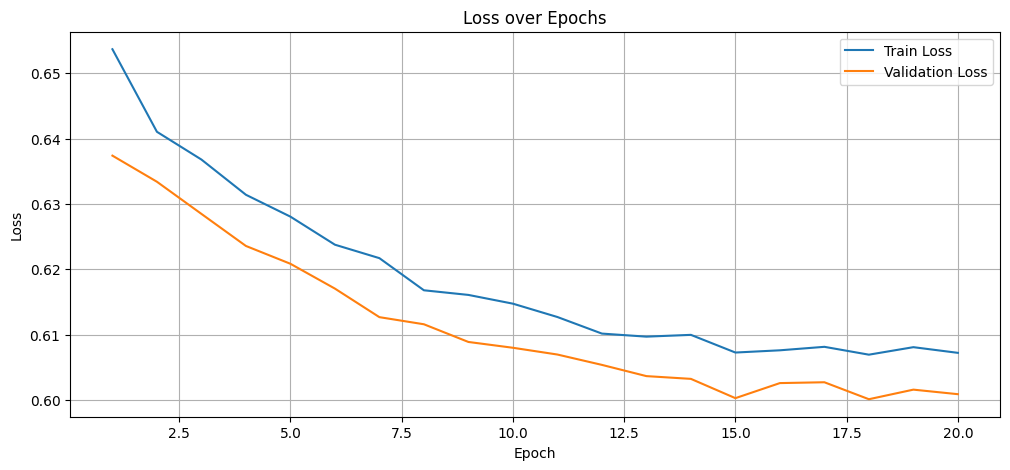

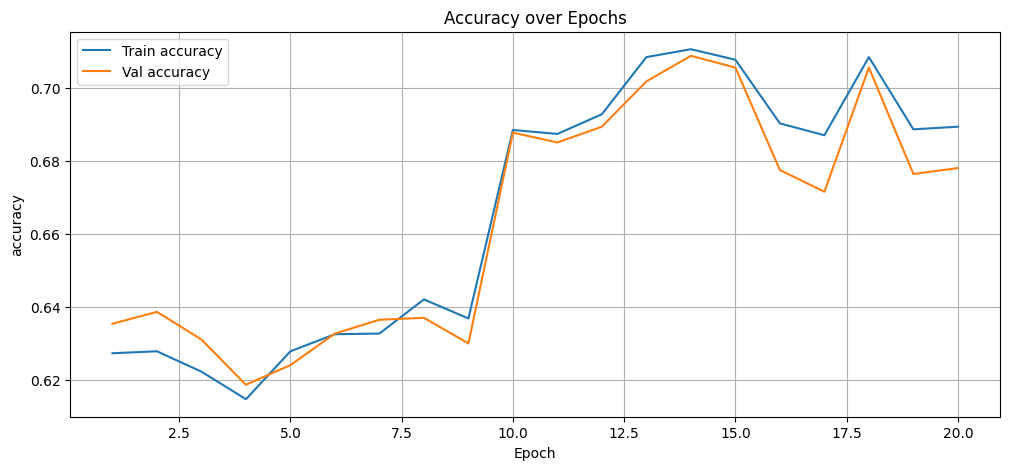

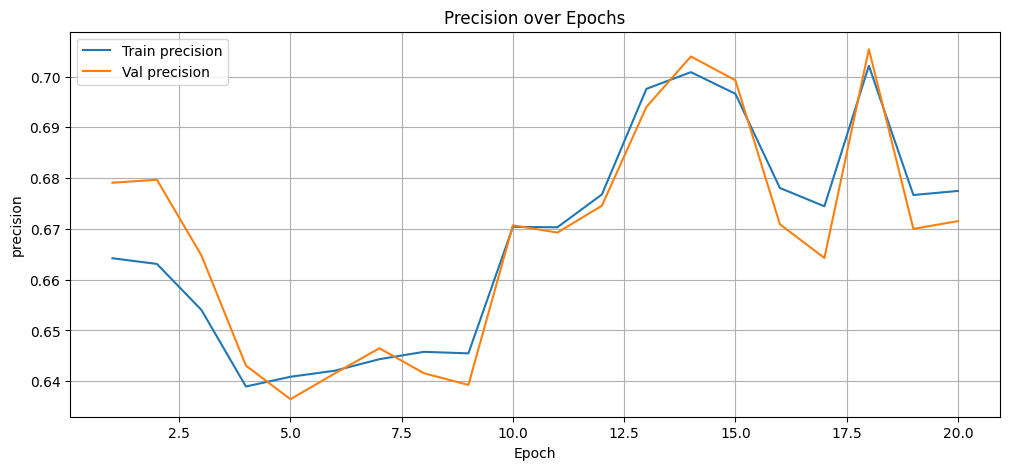

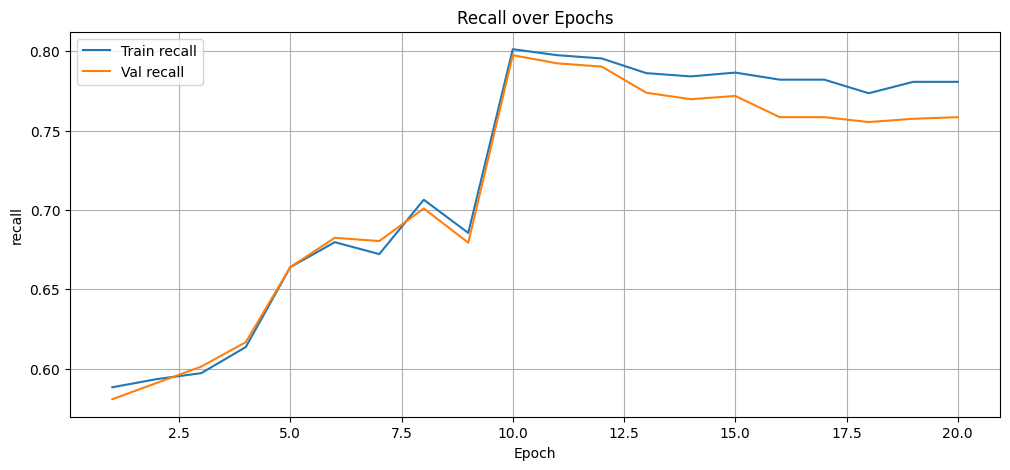

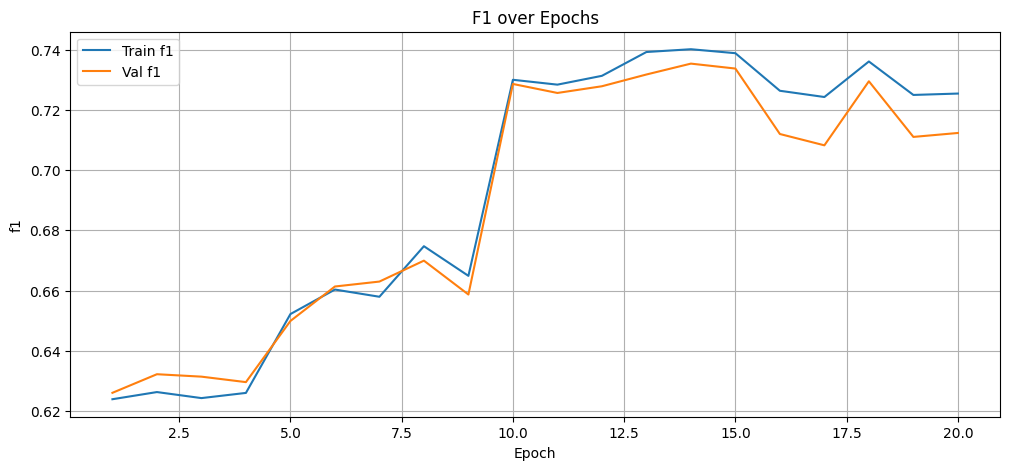

In [67]:
plot_history(history_improve)

In [68]:
train_metrics = evaluate_metrics(improve_model, train_dataloader)
train_metrics

{'accuracy': 0.6893571042679633,
 'precision': 0.6774673008323424,
 'recall': 0.7807468311065433,
 'f1': 0.7254496259748527}

In [69]:
val_metrics = evaluate_metrics(improve_model, val_dataloader)
val_metrics

{'accuracy': 0.678011885467315,
 'precision': 0.6715195632393085,
 'recall': 0.7584789311408017,
 'f1': 0.7123552123552124}

In [70]:
test_metrics = evaluate_metrics(improve_model, test_dataloader)
test_metrics

{'accuracy': 0.7039438141545111,
 'precision': 0.6944190301921317,
 'recall': 0.7800616649537513,
 'f1': 0.7347531461761858}

**1. Динамика ошибки (Loss)**

Анализ графиков ошибкок показывает:

* **Train loss** постепенно убывает без резких скачков.
* **Validation loss** также снижается, оставаясь близким к training loss.

Добавление Dropout тут не внесло существенных изменений.

**2. Динамика метрик качества**

Во время обучения:

* Accuracy, Precision, F1-score росли скачкообазно.
* Модель обучается не совсем устойчиво, с колебаниями метрик.
* Приблизительно к 10 эпохе произошел скачок роста метрик.


**3. Итоговые значения метрик на трёх выборках**

**Train**

* Accuracy: **0.689**
* Precision: **0.677**
* Recall: **0.780**
* F1: **0.725**

**Validation**

* Accuracy: **0.678**
* Precision: **0.671**
* Recall: **0.758**
* F1: **0.712**

**Test**

* Accuracy: **0.704**
* Precision: **0.694**
* Recall: **0.780**
* F1: **0.735**

Метрики **почти не отличаются между Train, Val и Test**, что указывает на:

* хорошую способность модели к обобщению,
* отсутствие переобучения,
* умеренную регуляризацию.

In [95]:
evaluate_classification(improve_model, test_dataloader, "Test")


 Test

Classification Report:
              precision    recall  f1-score   support

         0.0     0.7177    0.6196    0.6650       878
         1.0     0.6944    0.7801    0.7348       973

    accuracy                         0.7039      1851
   macro avg     0.7060    0.6998    0.6999      1851
weighted avg     0.7055    0.7039    0.7017      1851



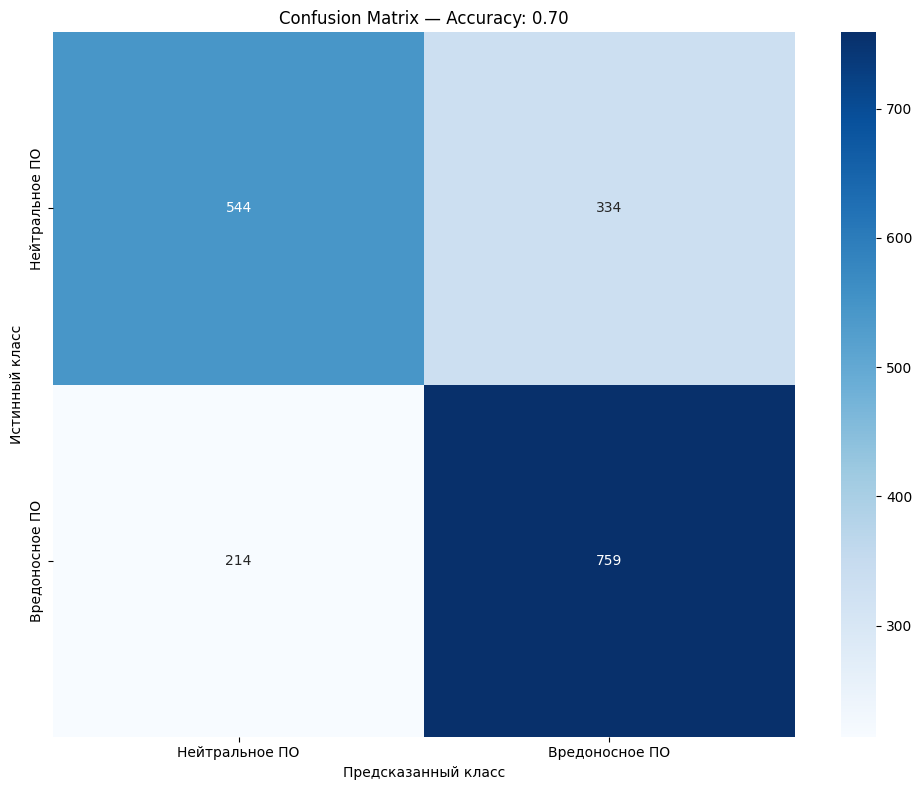

In [96]:
y_true, y_pred = get_predictions(improve_model, test_dataloader)
plot_confusion_matrix(y_true, y_pred)

**Анализ улучшений после добавления Dropout**


**1. Класс 0 - нейтральное ПО**

После добавления Dropout:

* **544 нейтральных образца** классифицированы правильно
  (до было 575 - небольшое снижение точности на этом классе).

* **334 нейтральных образца** ошибочно определены как вредоносные
  (до было 303 - рост ложных срабатываний).

Это означает, что количество **False Positive** увеличилось:
модель стала чаще “перестраховываться”, принимая безопасное ПО за вредоносное.
Такое поведение типично, когда модель начинает усиливать чувствительность к более опасному классу.


**2. Класс 1 - вредоносное ПО**

После применения Dropout:

* **759 вредоносных образцов** распознаны правильно
  (рост с 735 => +24 правильных детекций).

* **214 образцов** модель ошибочно считает безопасными
  (снижение с 238 => −24 опасных пропусков).

Это ключевое улучшение: уменьшение False Negative (FN)
означает, что модель реже пропускает вредоносное ПО,
что является самым важным критерием качества.


**3.Вывод**

* Модель стала ощутимо лучше распознавать вредоносное ПО (класс 1):

  * **FN уменьшились (238 => 214)**

* Но за счёт этого увеличилось количество ложных тревог:

  * **FP выросли (303 → 334)**

Поведение модели стало более «агрессивным» в обнаружении вредоносных объектов -
и это закономерный результат добавления Dropout, который снизил переобучение и укрепил способность сети замечать рискованные паттерны.

## Инициализация улучшенной нейронной сети. BatchNorm1d

**BatchNorm1d** может улучшить результат, потому что он нормализует входы каждого батча, выравнивая их распределение с нулевым средним и единичной дисперсией. Это, в свою очередб, снижает колебания градиентов и ускоряет сходимость обучения

In [73]:
class ImprovedNet_v1(torch.nn.Module):
    def __init__(self, 
                 n_features=2, 
                 n_neurons=16,
                ): 
        
        super().__init__()
        
        self.fc1 = torch.nn.Linear(n_features, n_neurons)
        
        self.bn1 = torch.nn.BatchNorm1d(n_neurons)
        
        self.act1 = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Linear(n_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x


In [74]:
improve_model_v1 = ImprovedNet_v1().to(device)
improve_model_v1

ImprovedNet_v1(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)

**Структура сети:**

1. **Входной слой**

   * Принимает два стандартизированных признака (in_features=2).

2. **Скрытый слой**

   * **fc1**: полносвязный слой из 16 нейронов.
   * **bn1**: BatchNorm1d, нормализует выходные значения слоя, стабилизируя обучение.
   * **act1**: функция активации ReLU, добавляет нелинейность.

3. **Выходной слой**

   * **fc2**: один нейрон, выдающий логит (ненормированное значение).
   * На выходе используется **BCEWithLogitsLoss()**, поэтому сигмоида применяется внутри функции ошибки.

In [75]:
optimizer_improve_v1 = torch.optim.Adam(improve_model_v1.parameters(), lr = 0.01)

In [76]:
history_improve_v1 = {
                        "train_loss": [],
                        "val_loss": [],
                        "train_metrics": [],
                        "val_metrics": []
                    }

In [77]:
num_epochs = 20

for epoch in range(num_epochs):
    
    avg_epoch_train_loss = train(model = improve_model_v1, optimizer = optimizer_improve_v1)
    avg_epoch_val_loss = validation(model = improve_model_v1)
    
    # Метрики
    train_metrics = evaluate_metrics(improve_model_v1, train_dataloader)
    val_metrics = evaluate_metrics(improve_model_v1, val_dataloader)

    # Сохранение истории
    history_improve_v1["train_loss"].append(avg_epoch_train_loss)
    history_improve_v1["val_loss"].append(avg_epoch_val_loss)
    history_improve_v1["train_metrics"].append(train_metrics)
    history_improve_v1["val_metrics"].append(val_metrics)

    # Вывод
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f" Train Loss: {avg_epoch_train_loss:.6f}")
    print(f" Val Loss:   {avg_epoch_val_loss:.6f}")
    print(f" Train Metrics: acc={train_metrics['accuracy']:.3f}, "
          f"prec={train_metrics['precision']:.3f}, "
          f"rec={train_metrics['recall']:.3f}, f1={train_metrics['f1']:.3f}")
    print(f" Val   Metrics: acc={val_metrics['accuracy']:.3f}, "
          f"prec={val_metrics['precision']:.3f}, "
          f"rec={val_metrics['recall']:.3f}, f1={val_metrics['f1']:.3f}\n")

Epoch 1/20
 Train Loss: 0.649521
 Val Loss:   0.642525
 Train Metrics: acc=0.633, prec=0.698, rec=0.532, f1=0.604
 Val   Metrics: acc=0.629, prec=0.704, rec=0.509, f1=0.591

Epoch 2/20
 Train Loss: 0.644170
 Val Loss:   0.638652
 Train Metrics: acc=0.631, prec=0.693, rec=0.534, f1=0.603
 Val   Metrics: acc=0.627, prec=0.698, rec=0.512, f1=0.591

Epoch 3/20
 Train Loss: 0.641148
 Val Loss:   0.633172
 Train Metrics: acc=0.632, prec=0.696, rec=0.531, f1=0.602
 Val   Metrics: acc=0.628, prec=0.702, rec=0.507, f1=0.589

Epoch 4/20
 Train Loss: 0.637433
 Val Loss:   0.628654
 Train Metrics: acc=0.631, prec=0.708, rec=0.507, f1=0.591
 Val   Metrics: acc=0.629, prec=0.712, rec=0.493, f1=0.583

Epoch 5/20
 Train Loss: 0.632580
 Val Loss:   0.623270
 Train Metrics: acc=0.654, prec=0.718, rec=0.563, f1=0.631
 Val   Metrics: acc=0.661, prec=0.733, rec=0.558, f1=0.634

Epoch 6/20
 Train Loss: 0.628271
 Val Loss:   0.619535
 Train Metrics: acc=0.653, prec=0.714, rec=0.567, f1=0.632
 Val   Metrics: 

In [78]:
train_metrics = evaluate_metrics(improve_model_v1, train_dataloader)
train_metrics

{'accuracy': 0.6799927966864758,
 'precision': 0.7478298611111112,
 'recall': 0.5902706406303528,
 'f1': 0.6597740762014168}

In [79]:
val_metrics = evaluate_metrics(improve_model_v1, val_dataloader)
val_metrics

{'accuracy': 0.6742301458670988,
 'precision': 0.7460106382978723,
 'recall': 0.5765673175745119,
 'f1': 0.6504347826086957}

In [80]:
test_metrics = evaluate_metrics(improve_model_v1, test_dataloader)
test_metrics

{'accuracy': 0.6834143706104808,
 'precision': 0.7522816166883963,
 'recall': 0.593011305241521,
 'f1': 0.6632183908045977}

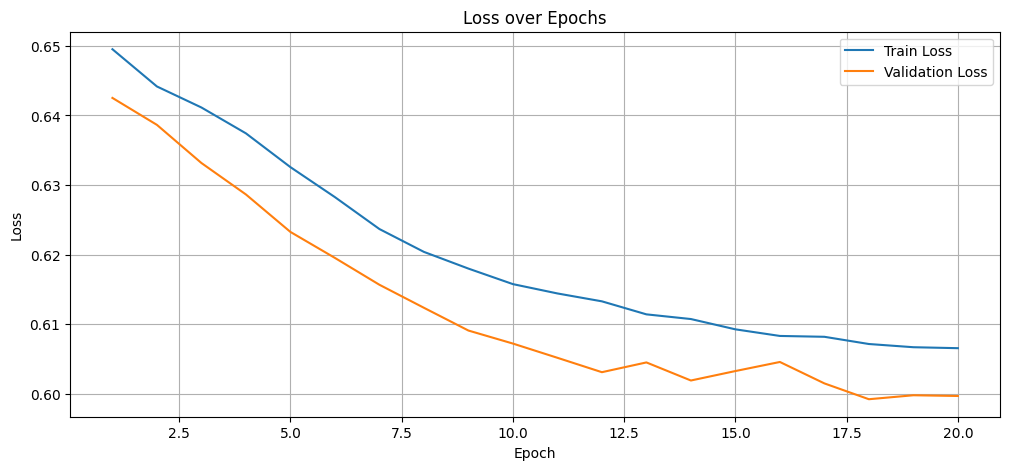

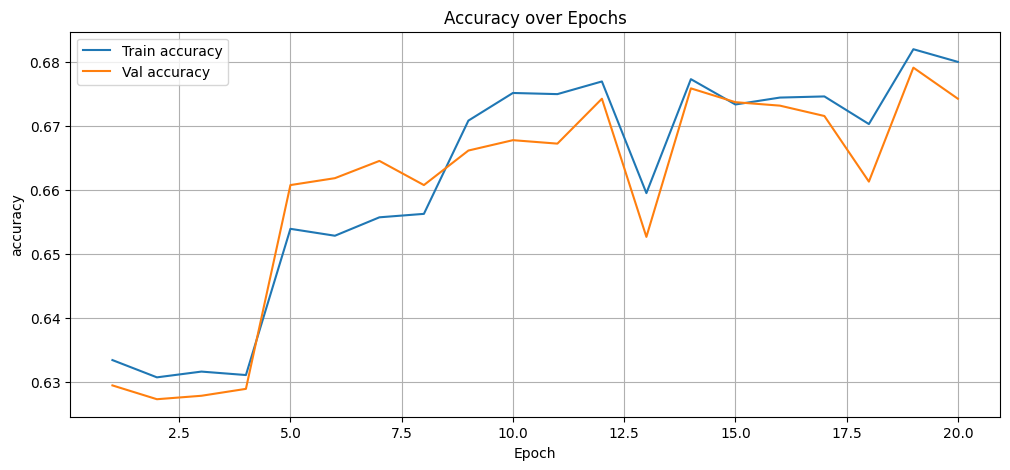

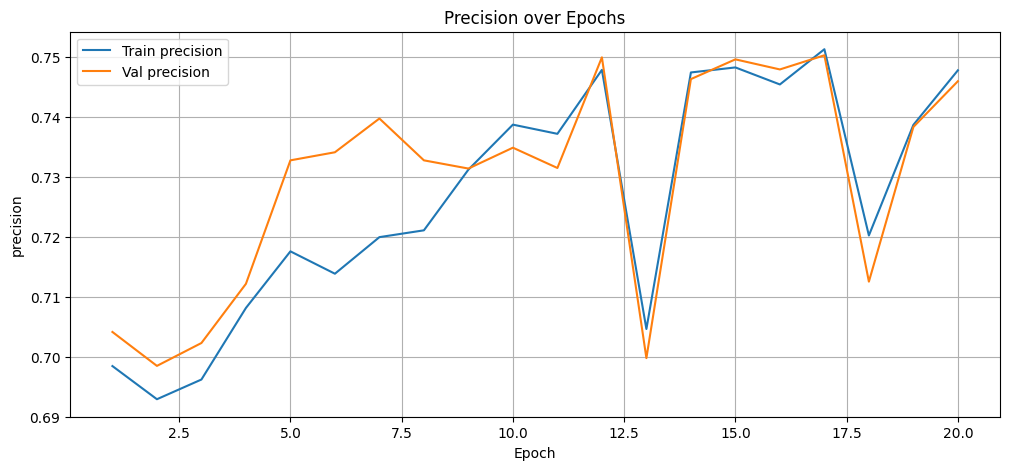

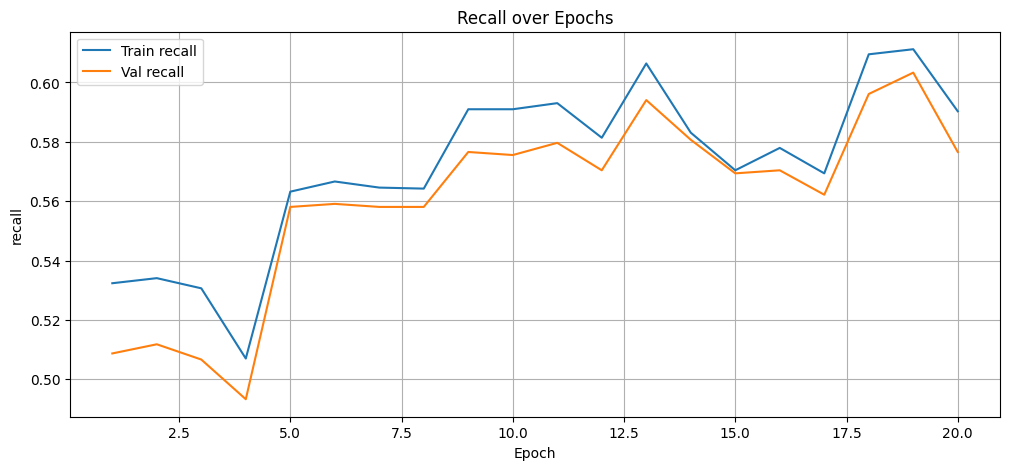

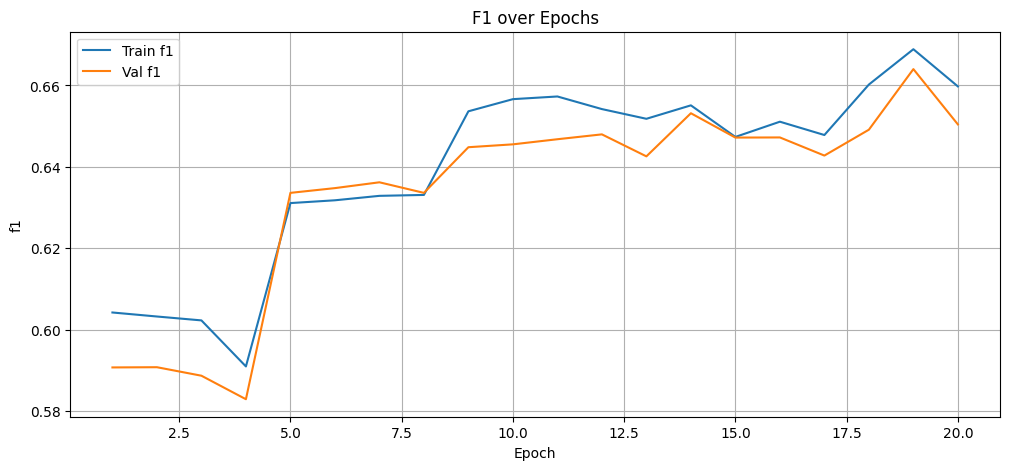

In [81]:
plot_history(history_improve_v1)

**1. Динамика ошибки (Loss)**

Анализ графиков ошибкок показывает:

* **Train loss** и **Validation loss** убывает более гладко, без резких скачков.


**2. Динамика метрик качества**

Во время обучения:

* Accuracy, Precision, F1-score росли скачкообазно.
* Модель обучается неустойчиво, с колебаниями метрик.


**3. Итоговые значения метрик на трёх выборках**

**Train**

* Accuracy: **0.679**
* Precision: **0.747**
* Recall: **0.590**
* F1: **0.659**

**Validation**
 
* Accuracy: **0.674**
* Precision: **0.746**
* Recall: **0.576**
* F1: **0.650**

**Test**
 
* Accuracy: **0.683**
* Precision: **0.752**
* Recall: **0.593**
* F1: **0.663**

Метрики **почти не отличаются между Train, Val и Test**.

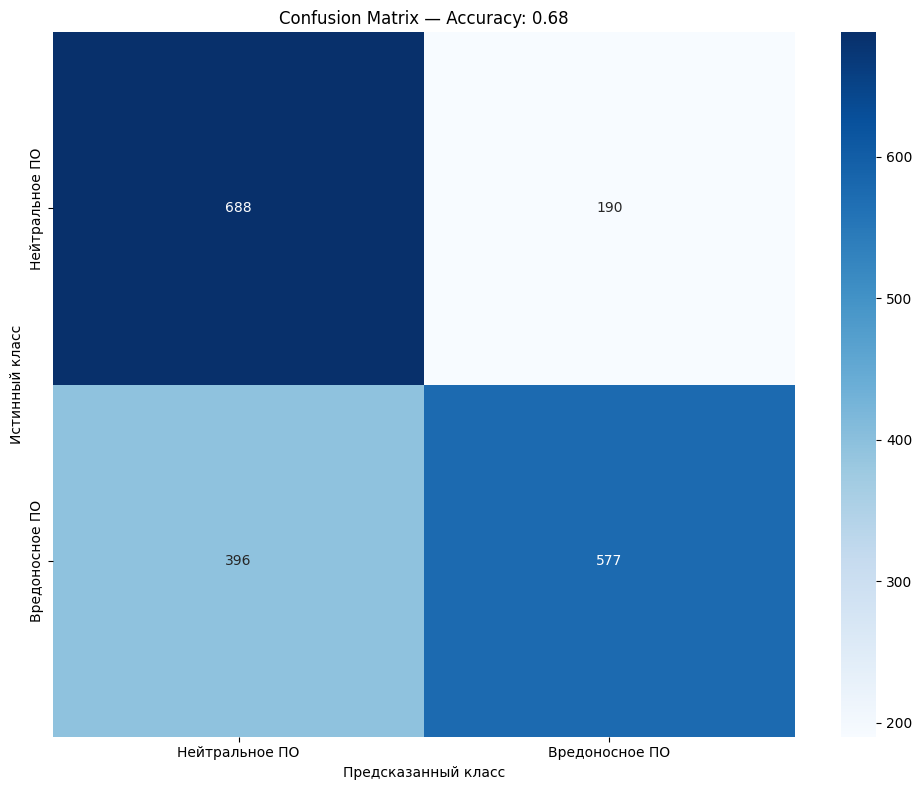

In [82]:
y_true, y_pred = get_predictions(improve_model_v1, test_dataloader)
plot_confusion_matrix(y_true, y_pred)

**1. Класс 0 - нейтральное ПО**

* **688 нейтральных образцов** распознаны верно.
* **190 образцов** ошибочно отнесены к вредоносным (FP).

Модель стала **реже ошибаться на классе 0** по сравнению с предыдущей версией без BatchNorm (FP уменьшились с 334 => 190).
Это означает, что сеть стала **более точной для нейтрального ПО**.


**2. Класс 1 - вредоносное ПО**

* **577 вредоносных образцов** распознаны верно.
* **396 образцов** ошибочно классифицированы как безопасные (FN).

Это указывает на **снижение Recall** по классу 1 - модель чаще пропускает вредоносное ПО по сравнению с версией с Dropout без BatchNorm (FN выросли с 214 => 396).


**3. Вывод**

* BatchNorm1d улучшила **точность на классе 0** — меньше ложных тревог для нейтрального ПО.
* Но при этом модель стала **менее чувствительной к классу 1** — увеличилось количество пропусков вредоносных объектов.
* FP и FN распределяются несимметрично:

  * FP (ошибки на классе 0) = 190
  * FN (ошибки на классе 1) = 396

## Инициализация улучшенной нейронной сети. Dropout + BatchNorm1d

Сочетание Dropout и BatchNorm1d может улучшить результат, потому что BatchNorm стабилизирует активации и ускоряет сходимость, а Dropout предотвращает переобучение, заставляя сеть учить более обобщённые признаки. Вместе они делают обучение более стабильным и повышают способность модели к обобщению.

Уменьшим размер батча.

In [132]:
BATCH_SIZE = 32

In [133]:
# Создаём DataLoader (чтобы получить батч)
train_dataloader = torch.utils.data.DataLoader(train_data, 
                                               batch_size=BATCH_SIZE,
                                               shuffle=False)


val_dataloader = torch.utils.data.DataLoader(val_data, 
                                             batch_size=BATCH_SIZE,
                                             shuffle=False)



test_dataloader = torch.utils.data.DataLoader(test_data, 
                                              batch_size=BATCH_SIZE,
                                              shuffle=False)

len(train_dataloader), len(val_dataloader), len(test_dataloader)

(174, 58, 58)

In [120]:
class ImprovedNet_v2(torch.nn.Module):
    def __init__(self, 
                 n_features=2, 
                 n_neurons=16,
                 dropout_p=0.4
                ):  # минимальный dropout!
        
        super().__init__()
        
        self.fc1 = torch.nn.Linear(n_features, n_neurons)

        self.bn1 = torch.nn.BatchNorm1d(n_neurons)
        
        self.drop = torch.nn.Dropout(dropout_p)

        self.act1 = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Linear(n_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.drop(x)
        x = self.fc2(x)
        return x


**Структура сети:**

1. **Входной слой**

   * Принимает два стандартизированных признака (in_features=2).

2. **Скрытый слой**

   * **fc1**: полносвязный слой из 16 нейронов.
   * **bn1**: BatchNorm1d, нормализует выходные значения слоя, стабилизируя обучение.
   * **act1**: функция активации ReLU, добавляет нелинейность.
   * **drop**: Dropout с вероятностью отключения нейронов p=0.4 — регуляризация, предотвращающая переобучение.

3. **Выходной слой**

   * **fc2**: один нейрон, выдающий логит (ненормированное значение).
   * На выходе используется **BCEWithLogitsLoss()**, поэтому сигмоида применяется внутри функции ошибки.

In [121]:
improve_model_v2 = ImprovedNet_v2().to(device)
improve_model_v2

ImprovedNet_v2(
  (fc1): Linear(in_features=2, out_features=16, bias=True)
  (bn1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.4, inplace=False)
  (act1): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
)

In [122]:
optimizer_improve_v2 = torch.optim.Adam(improve_model_v2.parameters(), lr = 0.01)

In [123]:
history_improve_v2 = {
                        "train_loss": [],
                        "val_loss": [],
                        "train_metrics": [],
                        "val_metrics": []
                    }

In [124]:
num_epochs = 20

for epoch in range(num_epochs):
    
    avg_epoch_train_loss = train(model = improve_model_v2, optimizer = optimizer_improve_v2)
    avg_epoch_val_loss = validation(model = improve_model_v2)
    
    # Метрики
    train_metrics = evaluate_metrics(improve_model_v2, train_dataloader)
    val_metrics = evaluate_metrics(improve_model_v2, val_dataloader)

    # Сохранение истории
    history_improve_v2["train_loss"].append(avg_epoch_train_loss)
    history_improve_v2["val_loss"].append(avg_epoch_val_loss)
    history_improve_v2["train_metrics"].append(train_metrics)
    history_improve_v2["val_metrics"].append(val_metrics)

    # Вывод
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f" Train Loss: {avg_epoch_train_loss:.6f}")
    print(f" Val Loss:   {avg_epoch_val_loss:.6f}")
    print(f" Train Metrics: acc={train_metrics['accuracy']:.3f}, "
          f"prec={train_metrics['precision']:.3f}, "
          f"rec={train_metrics['recall']:.3f}, f1={train_metrics['f1']:.3f}")
    print(f" Val   Metrics: acc={val_metrics['accuracy']:.3f}, "
          f"prec={val_metrics['precision']:.3f}, "
          f"rec={val_metrics['recall']:.3f}, f1={val_metrics['f1']:.3f}\n")

Epoch 1/20
 Train Loss: 0.657630
 Val Loss:   0.641639
 Train Metrics: acc=0.633, prec=0.697, rec=0.535, f1=0.606
 Val   Metrics: acc=0.633, prec=0.705, rec=0.517, f1=0.597

Epoch 2/20
 Train Loss: 0.650762
 Val Loss:   0.640395
 Train Metrics: acc=0.613, prec=0.642, rec=0.598, f1=0.619
 Val   Metrics: acc=0.607, prec=0.638, rec=0.586, f1=0.611

Epoch 3/20
 Train Loss: 0.650801
 Val Loss:   0.639259
 Train Metrics: acc=0.627, prec=0.666, rec=0.582, f1=0.622
 Val   Metrics: acc=0.627, prec=0.670, rec=0.571, f1=0.617

Epoch 4/20
 Train Loss: 0.650298
 Val Loss:   0.638347
 Train Metrics: acc=0.619, prec=0.641, rec=0.625, f1=0.633
 Val   Metrics: acc=0.613, prec=0.636, rec=0.617, f1=0.626

Epoch 5/20
 Train Loss: 0.650784
 Val Loss:   0.635828
 Train Metrics: acc=0.619, prec=0.643, rec=0.617, f1=0.630
 Val   Metrics: acc=0.615, prec=0.639, rec=0.614, f1=0.626

Epoch 6/20
 Train Loss: 0.649834
 Val Loss:   0.634016
 Train Metrics: acc=0.622, prec=0.645, rec=0.626, f1=0.635
 Val   Metrics: 

In [134]:
train_metrics = evaluate_metrics(improve_model_v2, train_dataloader)
train_metrics

{'accuracy': 0.634071672969566,
 'precision': 0.6591316828130607,
 'recall': 0.6293251113394999,
 'f1': 0.6438836312653348}

In [135]:
val_metrics = evaluate_metrics(improve_model_v2, val_dataloader)
val_metrics

{'accuracy': 0.6353322528363047,
 'precision': 0.6633771929824561,
 'recall': 0.6217882836587872,
 'f1': 0.6419098143236074}

In [136]:
test_metrics = evaluate_metrics(improve_model_v2, test_dataloader)
test_metrics

{'accuracy': 0.6418152350081038,
 'precision': 0.6745495495495496,
 'recall': 0.6156217882836588,
 'f1': 0.6437399247716281}

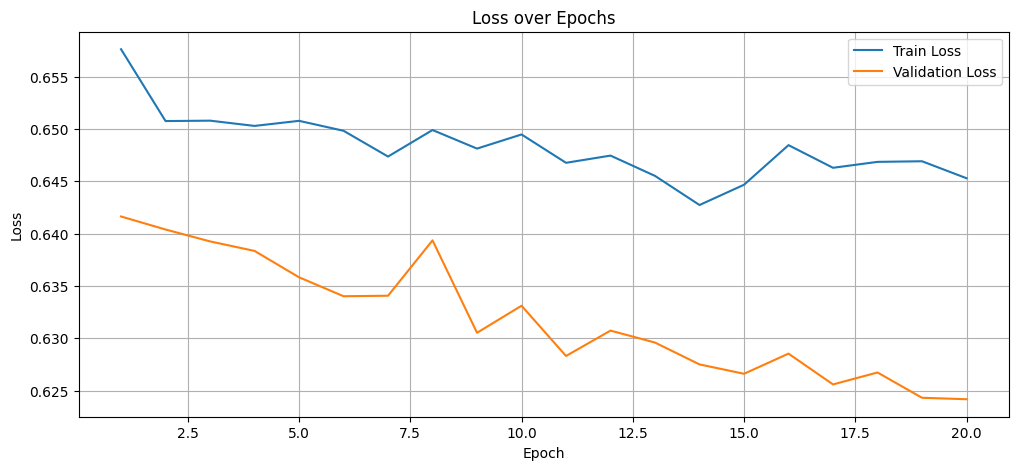

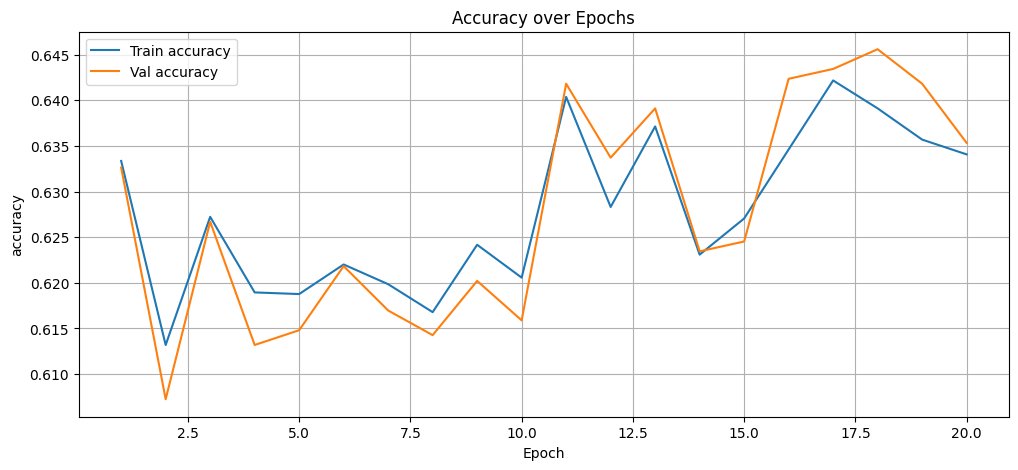

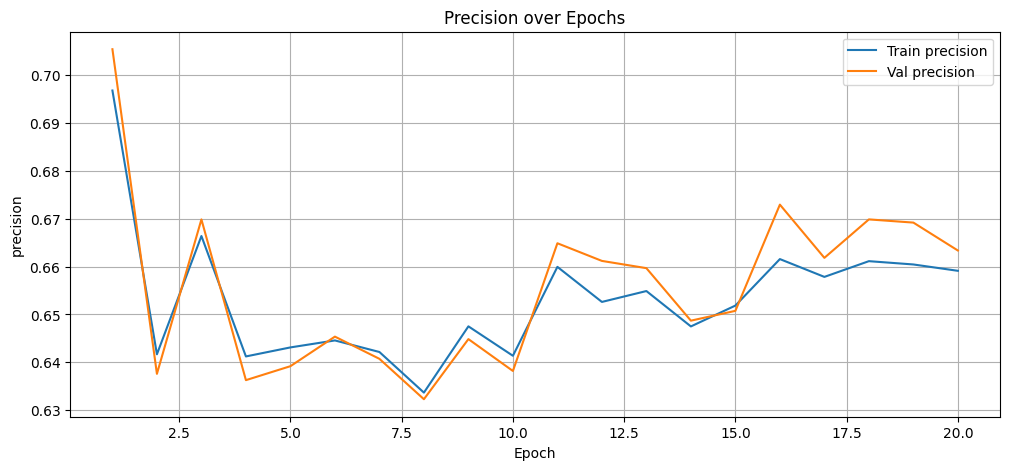

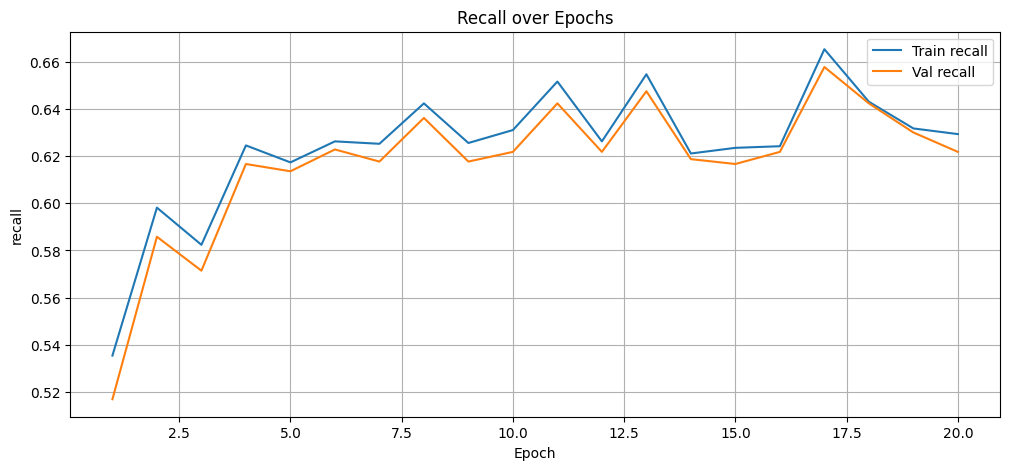

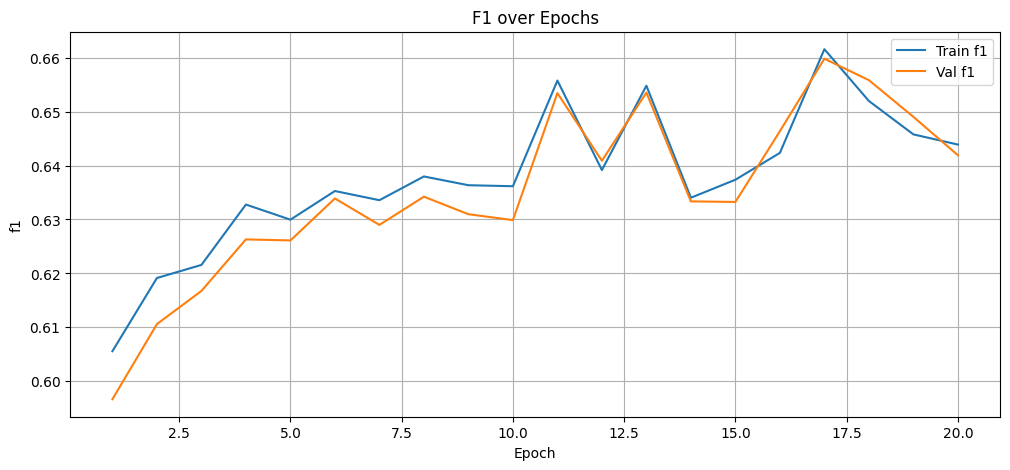

In [137]:
plot_history(history_improve_v2)

**1. Динамика ошибки (Loss)**

Графики **train loss** и  **validation loss**  убывают, но с колебаниями. Графики пилообразные.

Такое может быть из-за высокого дропаута (0.4) - для каждого батча сеть видит разные подмножества нейронов, что вызывает колебания градиентов и ошибки.

**2. Динамика метрик качества**

* Основные метрики (accuracy, precision, recall, F1) **не показывают заметного улучшения** по сравнению с предыдущими версиями.
* Графики метрик тоже скачкообразные.


**3. Итоговые значения метрик**

**Train:**

* Accuracy: 0.634
* Precision: 0.659
* Recall: 0.629
* F1: 0.644

**Validation:**

* Accuracy: 0.635
* Precision: 0.663
* Recall: 0.622
* F1: 0.642

**Test:**

* Accuracy: 0.642
* Precision: 0.675
* Recall: 0.616
* F1: 0.644

**4. Основные выводы**

* Высокий **Dropout (p=0.4)** привёл к чрезмерной регуляризации:

  * сеть стала **менее чувствительной к классу 1 (вредоносное ПО)**,
  * Recall снизился, что критично для задачи обнаружения угроз.

* Train и validation метрики почти совпадают — **модель не переобучилась**, но **потеряла способность обнаруживать вредоносные объекты**.

* Итог: высокая регуляризация защитила от переобучения, но **вредоносные объекты пропускаются чаще**, поэтому такой вариант **не подходит для практических задач безопасности**.

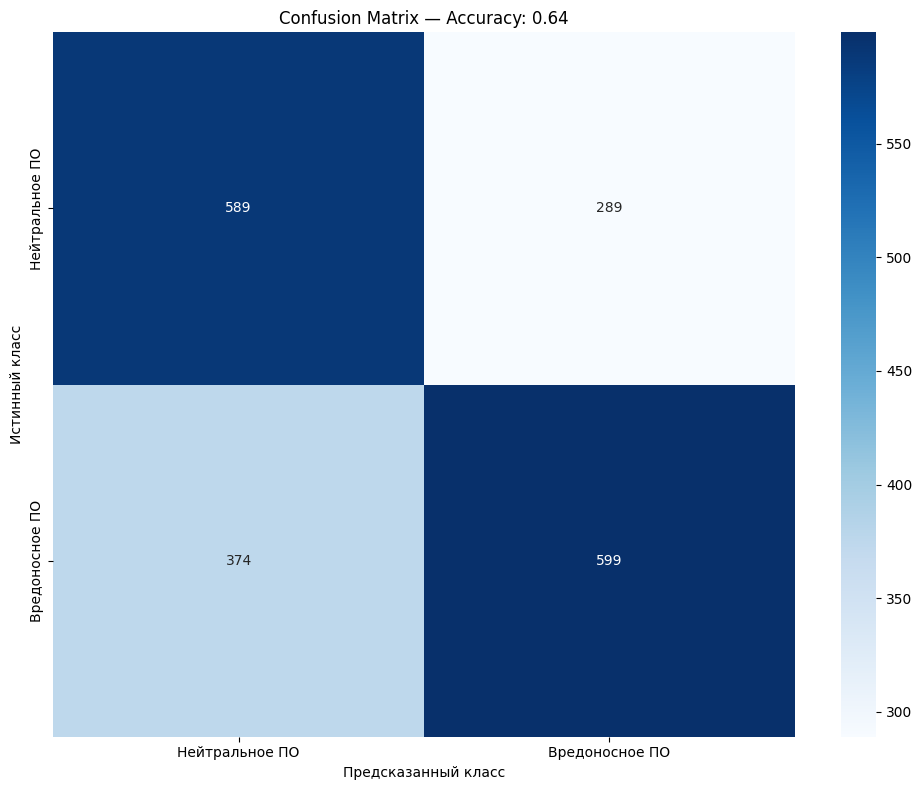

In [130]:
y_true, y_pred = get_predictions(improve_model_v2, test_dataloader)
plot_confusion_matrix(y_true, y_pred)

**1. Класс 0 - нейтральное ПО**

* **589 нейтральных образцов** классифицированы правильно.
* **289 образцов** ошибочно определены как вредоносные (FP).

Модель стала чаще «перестраховываться» по классу 0, чем без Dropout + BatchNorm (FP выросли с 190 => 289).
То есть сеть стала более консервативной в оценке нейтрального ПО.

**2. Класс 1 - вредоносное ПО**

* **599 вредоносных образцов** распознаны верно.
* **374 образца** модель ошибочно классифицирует как безопасные (FN).

Recall по классу 1 снизился по сравнению с версией только с BatchNorm (FN выросли с 396 => 374), но по сравнению с версией с Dropout без BatchNorm улучшение есть: модель лучше выявляет вредоносное ПО.

**3. Вывод**

* Комбинация **Dropout + BatchNorm** тоже имеет плохой результат по детекции классу 1 (FN = 374)

## Выводы

**Оптимальный порядок BatchNorm и Dropout**

**Linear → BatchNorm → ReLU → Dropout**

Это соответствует рекомендациям:

* BatchNorm нормализует *линейную* трансформацию перед функцией актвации.
* Dropout применяется *после* активации, чтобы “выбрасывать” активированные нейроны.

Ставить Dropout перед BatchNorm нельзя, потому что: Dropout случайно обнуляет элементы, BatchNorm пытается масштабировать/сдвигать значения => BN видит постоянно изменяющееся распределение => нестабильность.


**Как выбрать оптимальный `p?**

* p < 0.3 — оптимальная регуляризация
* p > 0.4 — модель начинает “забывать” слишком много

# **Выводы по работе и проведённым экспериментам**

**1. Этапы работы**

1. **Исследование и предобработка данных**

   * EDA, Анализ распределения признаков, удаление выбросов, стандартизация (StandardScaler).
   * Разделение выборки на train/val/test.

2. **Выбор и построение базовой модели**

   * Простая сеть с одним скрытым слоем (16 нейронов) и ReLU.
   * Обучение с BCEWithLogitsLoss и оптимизатором Adam.

3. **Оценка качества**

   * Анализ метрик (accuracy, precision, recall, F1) и confusion matrix.
   * Выявлено, что базовая модель достаточно хорошо распознаёт класс 1 (вредоносное ПО).


**2. Эксперименты с архитектурой и регуляризацией**

1. **Добавление Dropout**

   * Dropout снижает переобучение, увеличивает Recall по классу 1.
   * Основной эффект: лучшее обнаружение вредоносного ПО, но рост FP для класса 0.

2. **Добавление BatchNorm1d**

   * Стабилизирует обучение, ускоряет сходимость.
   * Повышает точность на классе 0, но снижает Recall по классу 1.

3. **Комбинация Dropout + BatchNorm1d**

   * Recall по классу 1 тоже высокий => результат неудовлетворительный.


**3. Лучший результат с Dropout**

| Метрика   | Train | Validation | Test  |
| --------- | ----- | ---------- | ----- |
| Accuracy  | 0.689 | 0.678      | 0.704 |
| Precision | 0.677 | 0.671      | 0.694 |
| Recall    | 0.780 | 0.758      | 0.780 |
| F1        | 0.725 | 0.712      | 0.735 |

* Confusion matrix показывает лучшее обнаружения вредоносного ПО: TP = 544, FN = 214, FP = 334, TN = 759.

**4. Обеспечена вопроизводимость результатов**